# Calculating Hotel Occupancy

---

> Hotel occupancy is a critical factor during the booking process and can provide additional insight into the likelihood of cancellations and/or forecasting future ADR.
> 
> However, *there's no clear indication of the total number of guest rooms for either hotel.*
>
> 
> I will determine the maximum number of rooms occupied for each date for each hotel, which can be used as a placeholder max occupancy number.

---

# Import Packages and Read Data

In [1]:
## Used to upload 
%load_ext autoreload
%autoreload 2

In [2]:
## Enabling access to custom functions in separate directory

# Import necessary modules
import os
import sys

# Construct the absolute path to the 'src' directory
src_path = os.path.abspath(os.path.join('..', 'src'))

# Append the path to 'sys.path'
if src_path not in sys.path:
    sys.path.append(src_path)

import db_utils, eda

## Data Handling
import pandas as pd
import numpy as np

import datetime as dt

## Visualizations
import matplotlib.pyplot as plt
# import plotly.express as px
# import seaborn as sns
import sweetviz as sv

## Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('display.max_rows', 50)
%matplotlib inline

## Load Pre-Reviewed Data

In [3]:
data_path = '../data/data_post_eda.feather'
df_data = pd.read_feather(data_path)
df_data.head()

IsCanceled  Adults  Children  Babies       Meal Country MarketSegment  \
0           0       2      0.00       0  BB            PRT        Direct   
1           0       2      0.00       0  BB            PRT        Direct   
2           0       1      0.00       0  BB            GBR        Direct   
3           0       1      0.00       0  BB            GBR     Corporate   
4           0       2      0.00       0  BB            GBR     Online TA   

  DistributionChannel  IsRepeatedGuest  PreviousCancellations  \
0              Direct                0                      0   
1              Direct                0                      0   
2              Direct                0                      0   
3           Corporate                0                      0   
4               TA/TO                0                      0   

   PreviousBookingsNotCanceled  ReservedRoomType  AssignedRoomType  \
0                            0  C                 C                  
1                            0  C                 C                  
2                            0  A                 C                  
3                            0  A                 A                  
4                            0  A                 A                  

   BookingChanges      DepositType        Agent      Company  \
0               3  No Deposit              NULL         NULL   
1               4  No Deposit              NULL         NULL   
2               0  No Deposit              NULL         NULL   
3               0  No Deposit               304         NULL   
4               0  No Deposit               240         NULL   

   DaysInWaitingList CustomerType   ADR  RequiredCarParkingSpaces  \
0                  0    Transient  0.00                         0   
1                  0    Transient  0.00                         0   
2                  0    Transient 75.00                         0   
3                  0    Transient 75.00                         0   
4                  0    Transient 98.00                         0   

   TotalOfSpecialRequests  HotelNumber  ArrivalDate_DaysBeforeHoliday  \
0                       0            1                             45   
1                       0            1                             45   
2                       0            1                             45   
3                       0            1                             45   
4                       1            1                             45   

   ArrivalDate_DaysAfterHoliday  DepartureDate_DaysBeforeHoliday  \
0                            21                               45   
1                            21                               45   
2                            21                               44   
3                            21                               44   
4                            21                               43   

   DepartureDate_DaysAfterHoliday  BookingDate_DaysBeforeHoliday  \
0                              21                             22   
1                              21                             52   
2                              22                             52   
3                              22                             58   
4                              23                             59   

   BookingDate_DaysAfterHoliday  ArrivalDate_WeekNumber  \
0                            44                      27   
1                            14                      27   
2                            14                      27   
3                             8                      27   
4                             7                      27   

   ArrivalDate_DayOfWeek  DepartureDate_WeekNumber  DepartureDate_DayOfWeek  \
0                      3                        27                        3   
1                      3                        27                        3   
2                      3                        27                        4   
3     

# Feature Engineering Based on Dates

---

* Reminder: moved most of the temporal feature engineering to an earlier notebook in this workflow.

---

                                             |                                             | [  0%]   00:00 ->…


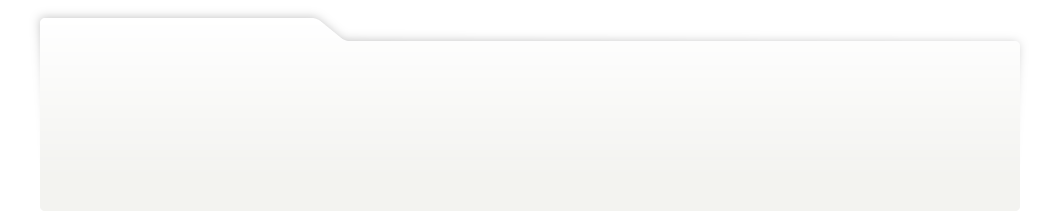
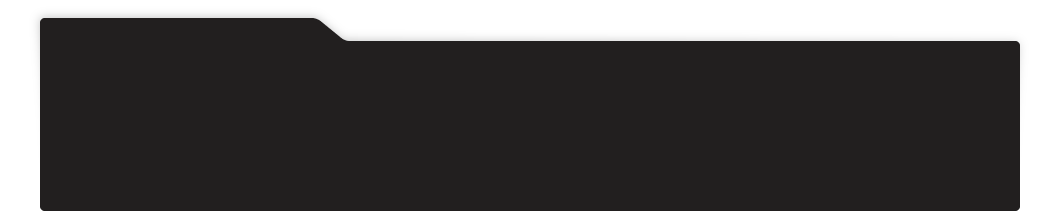
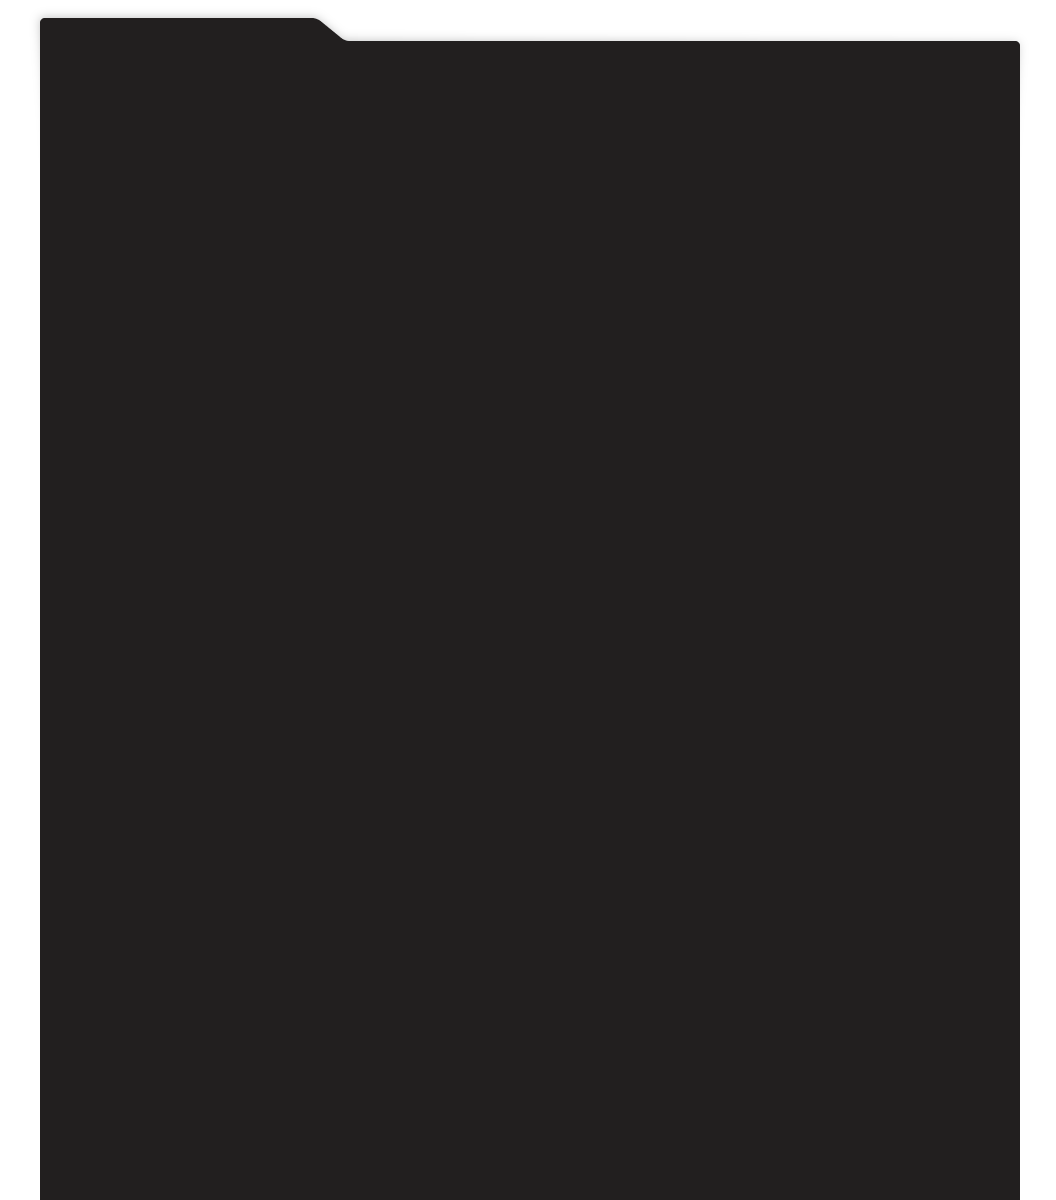
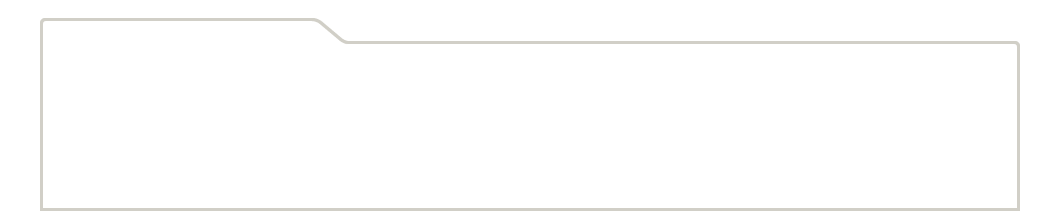
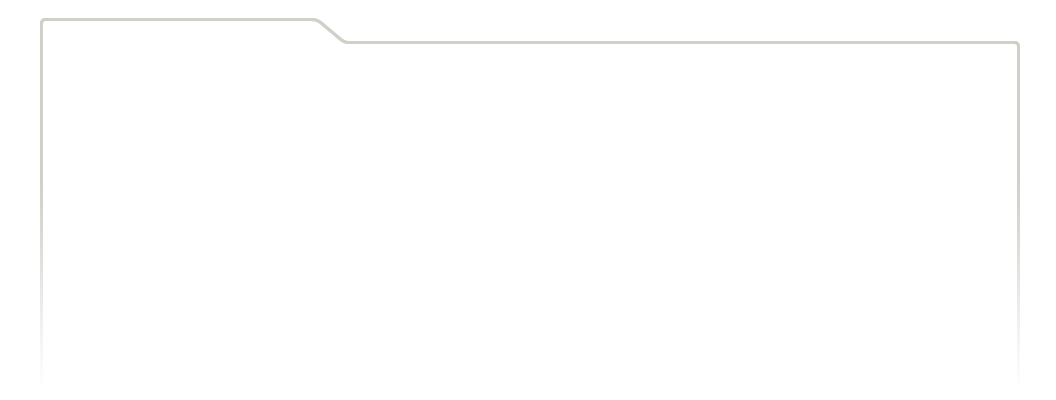
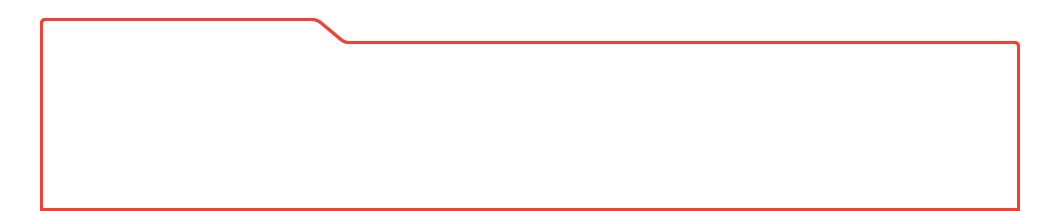
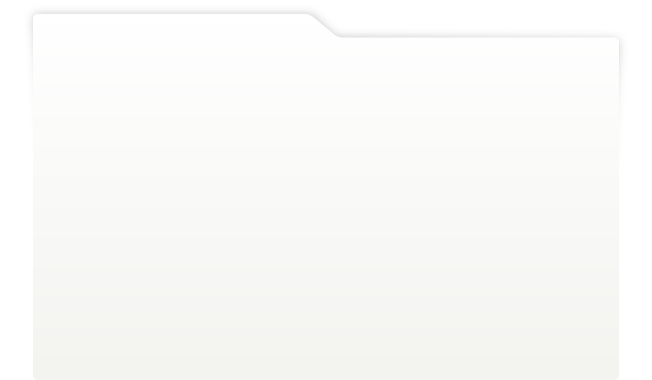
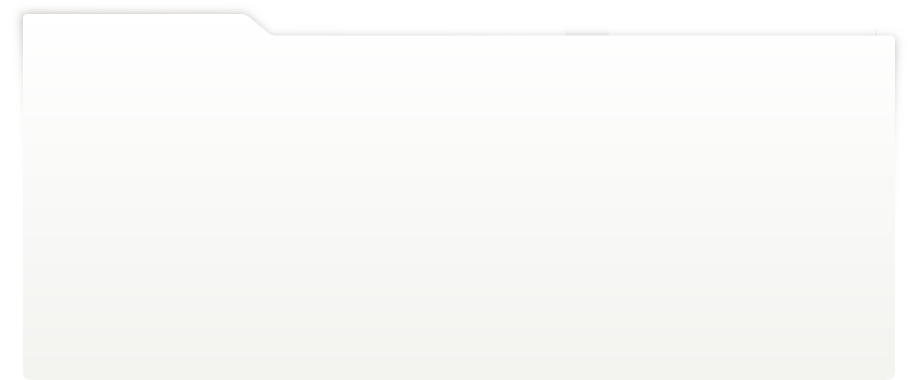
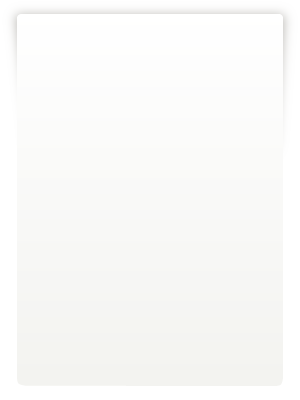
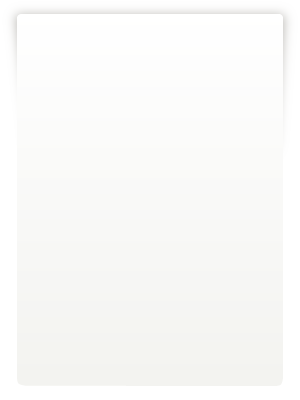
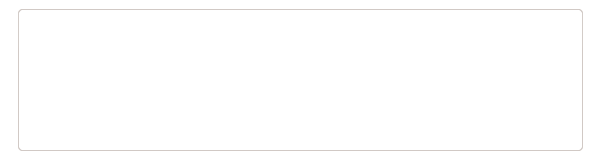
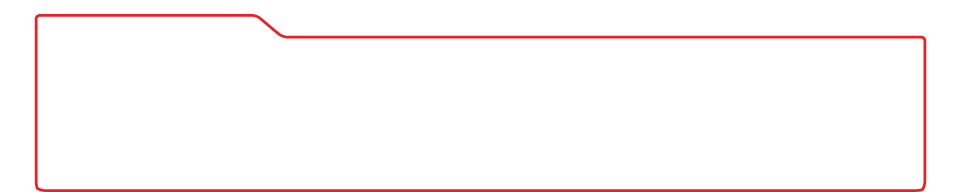
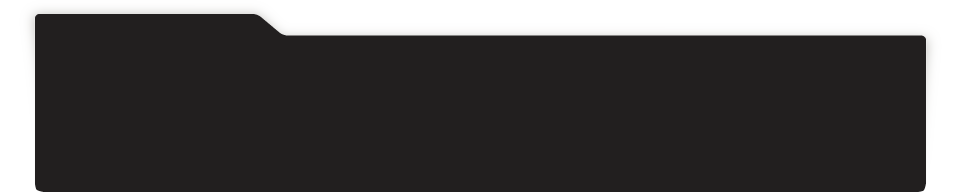
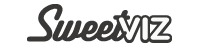
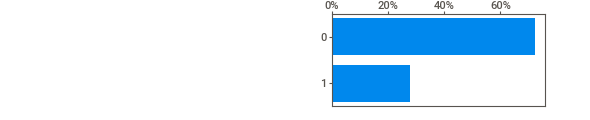
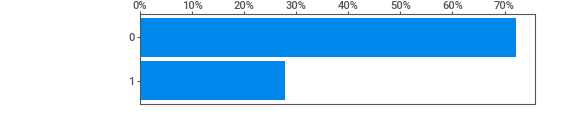
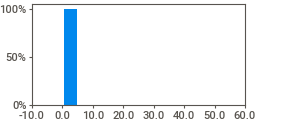
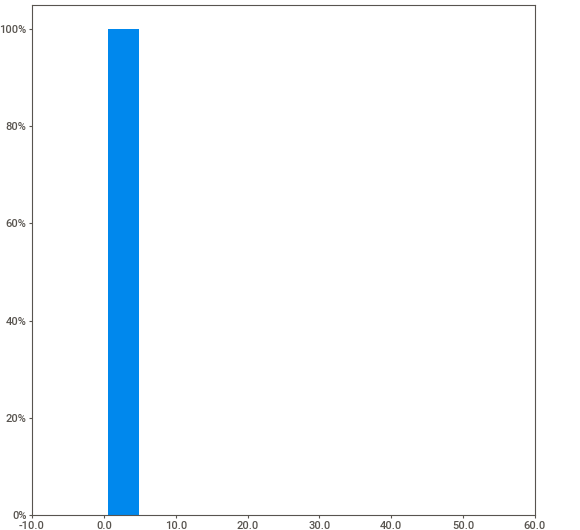
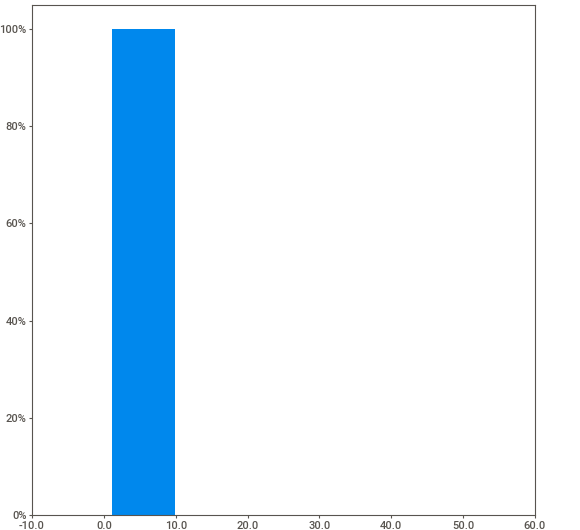
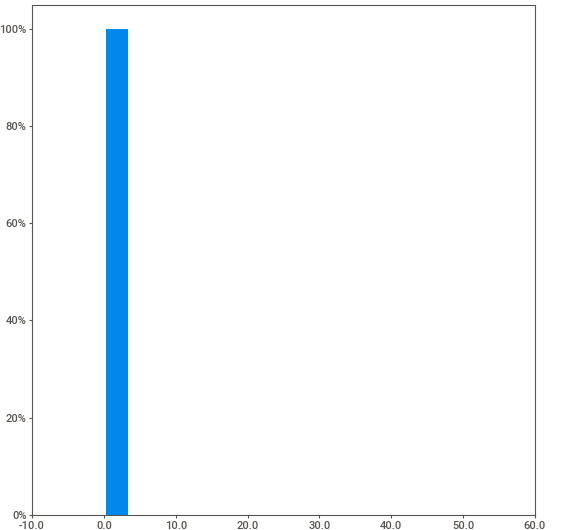
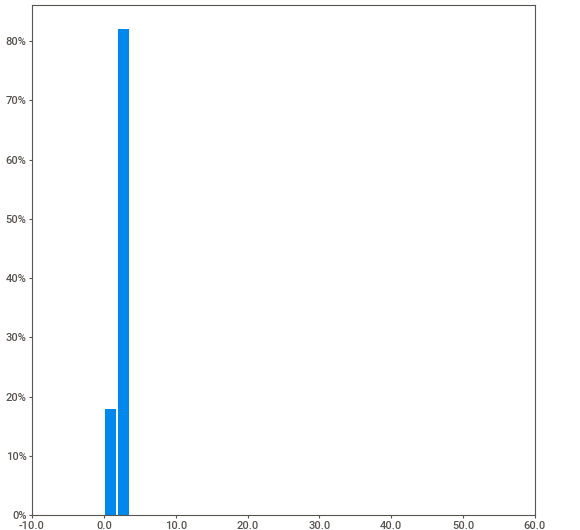
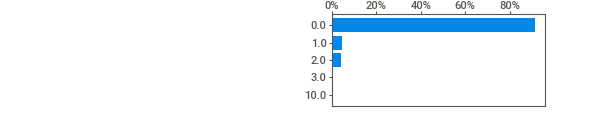
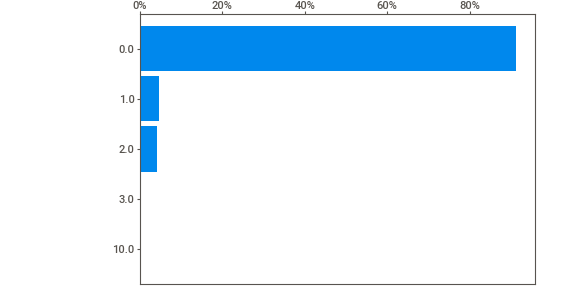
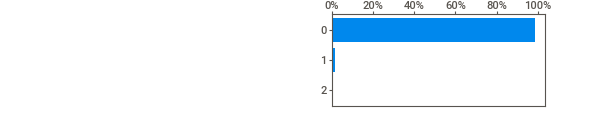
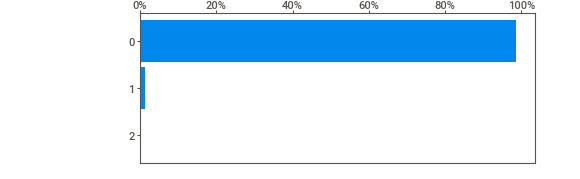
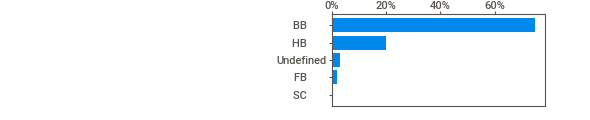
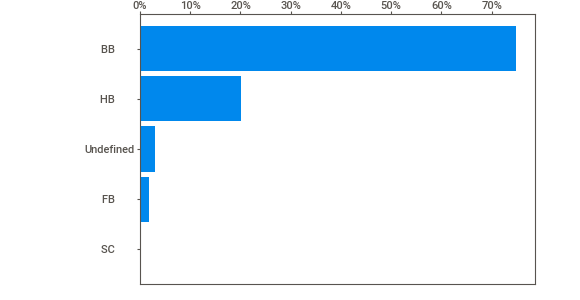
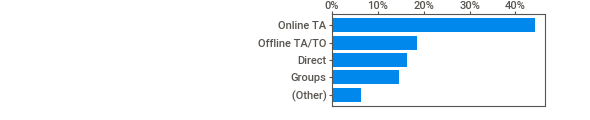
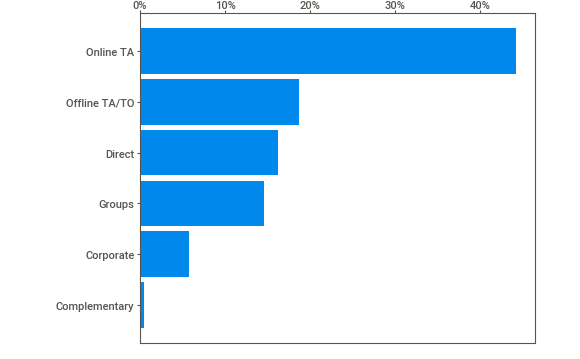
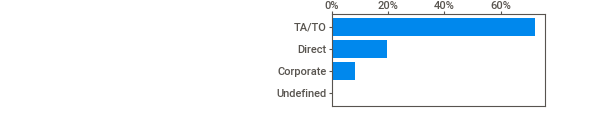
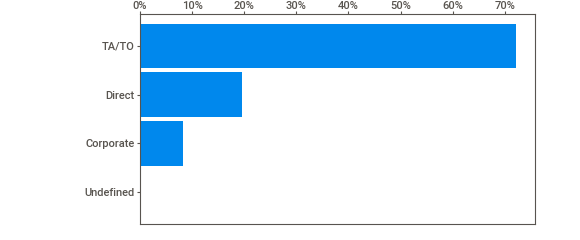
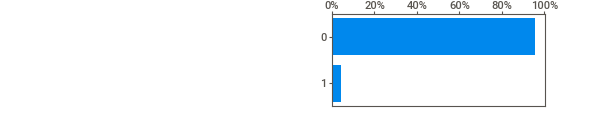
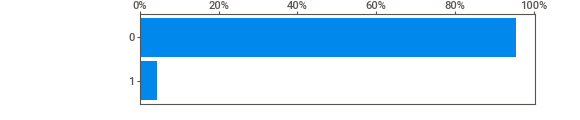
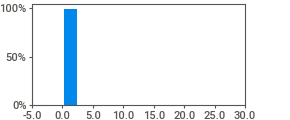
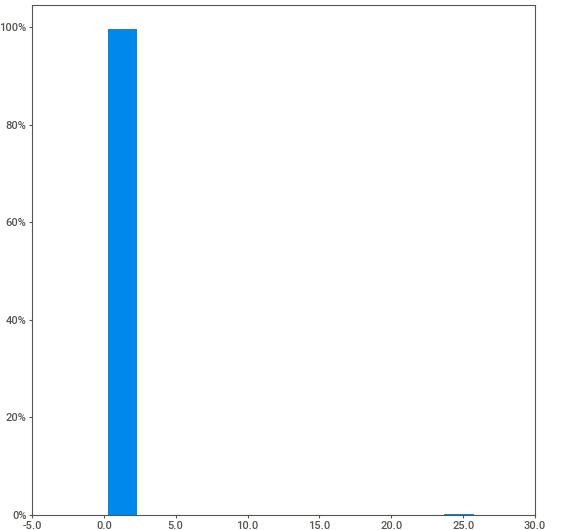
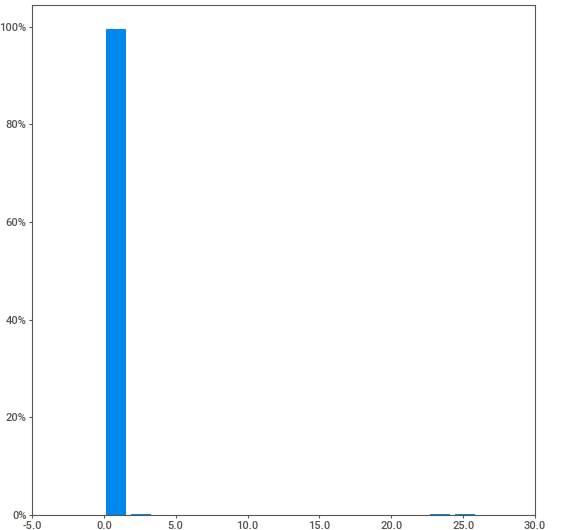
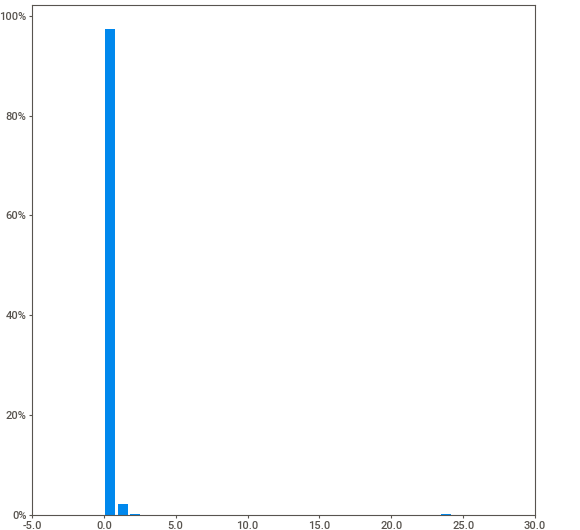
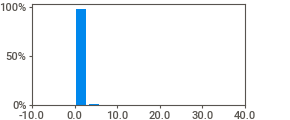
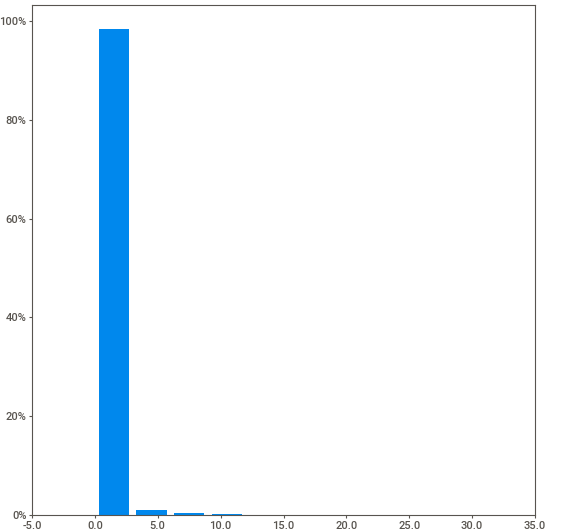
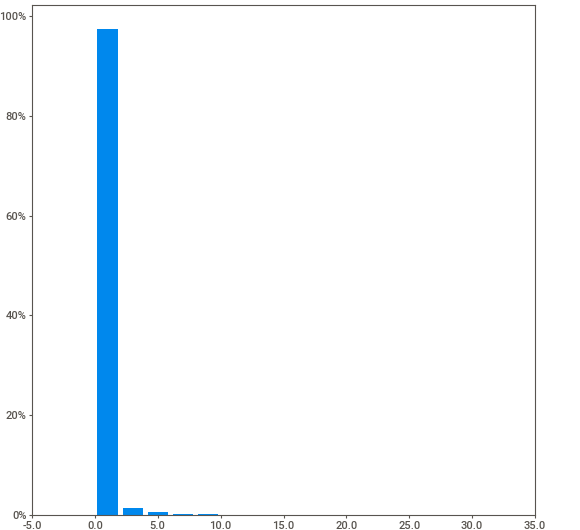
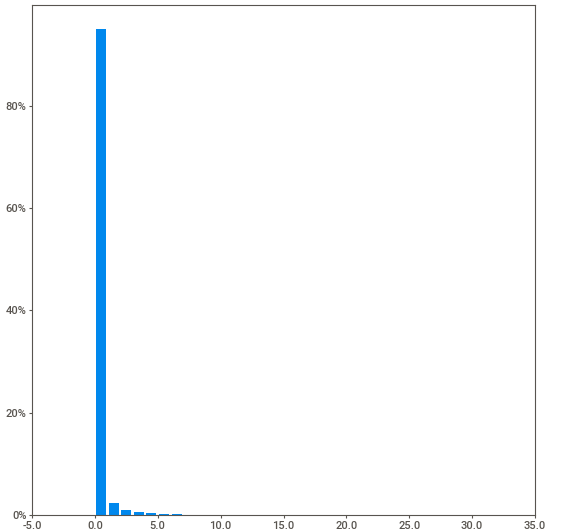
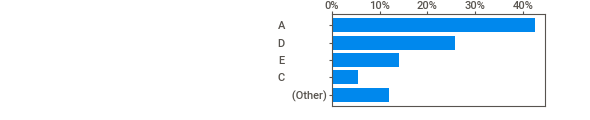
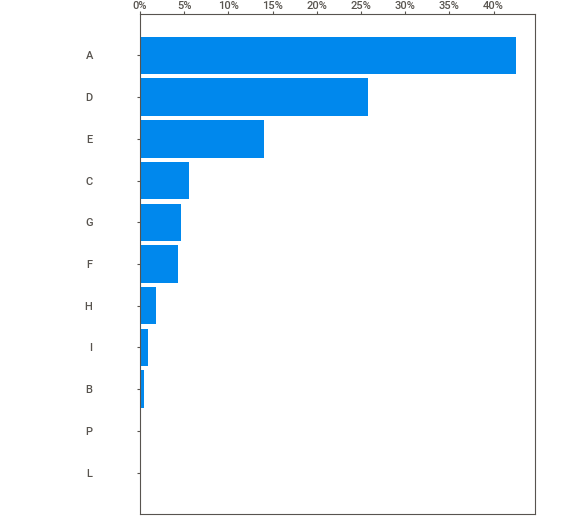
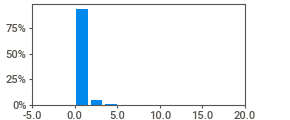
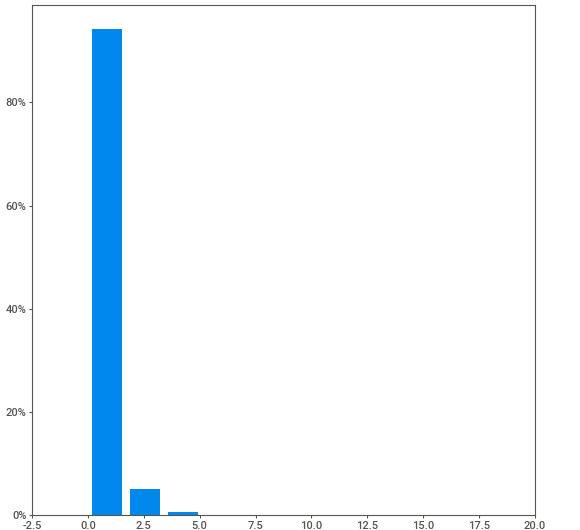
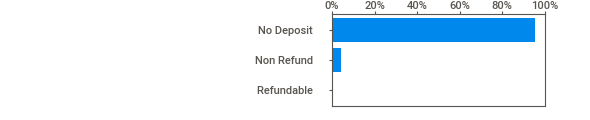
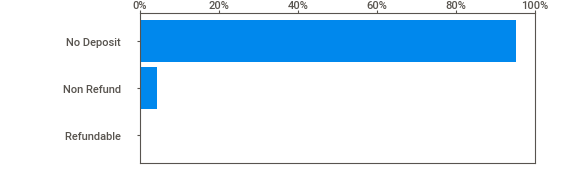
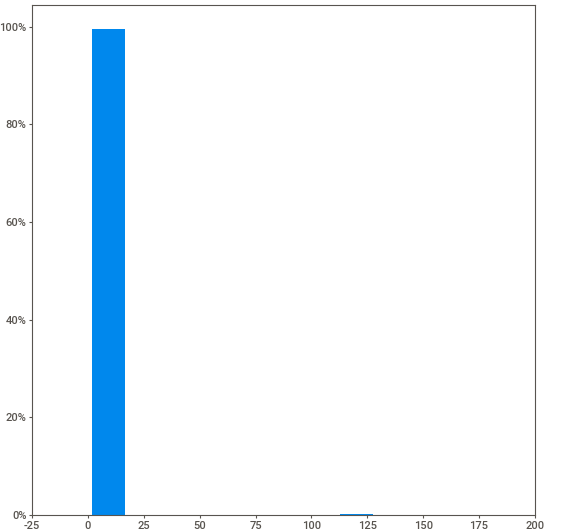
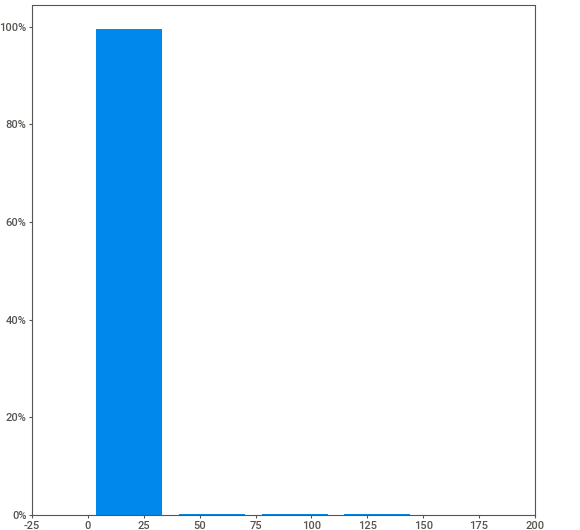
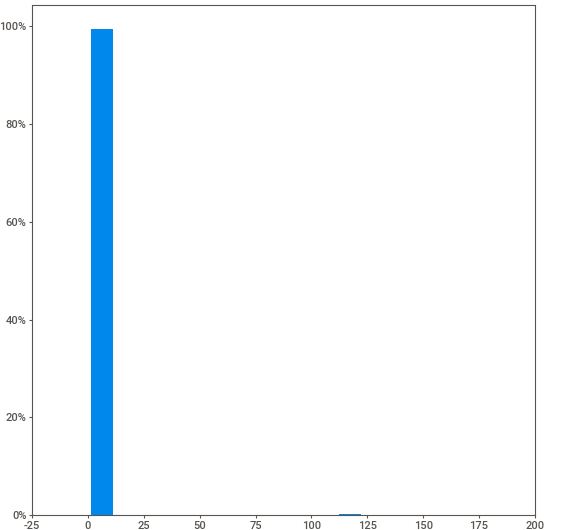
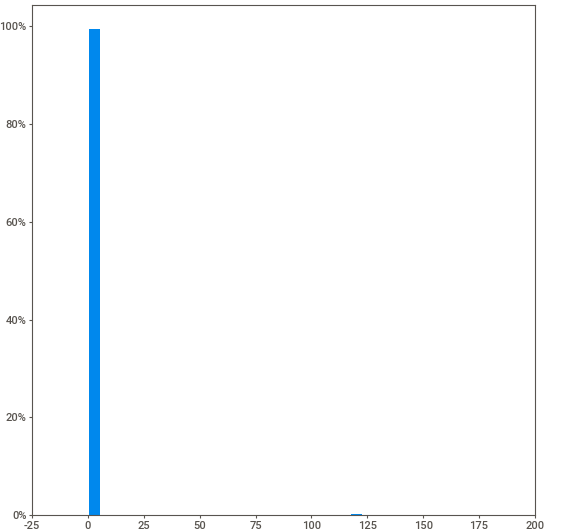
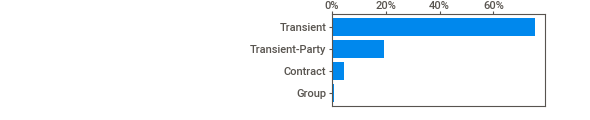
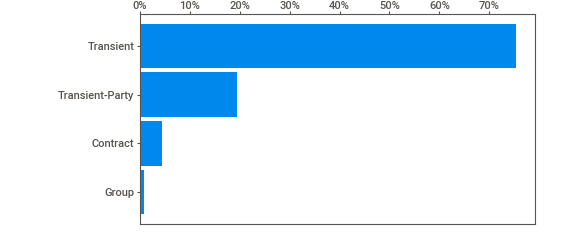
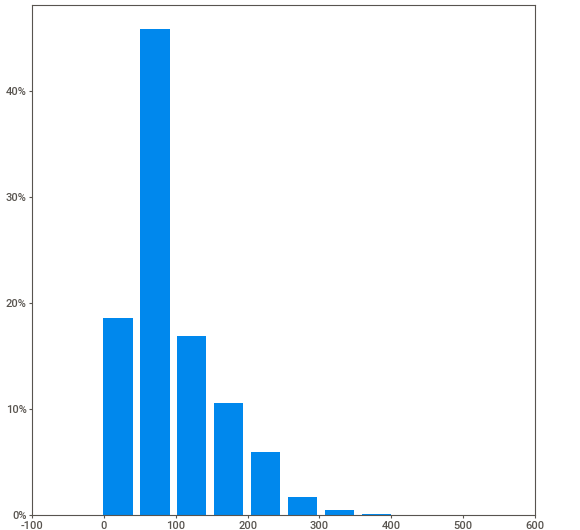
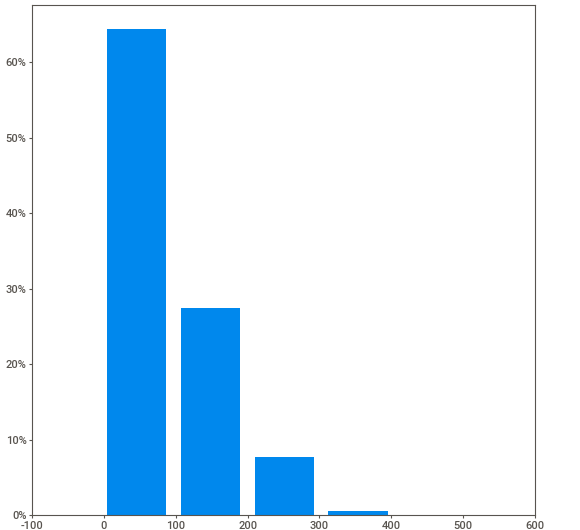
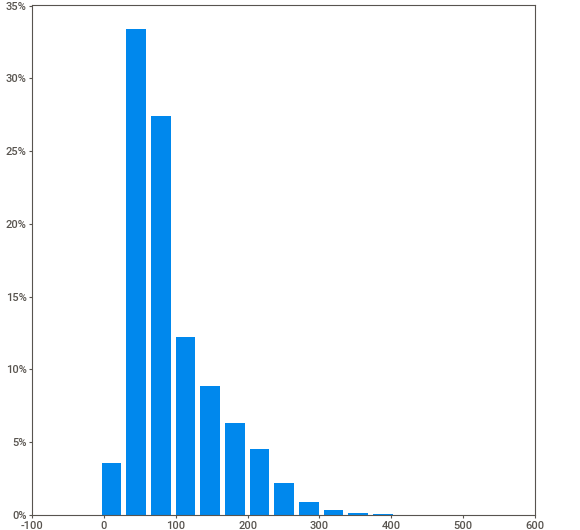
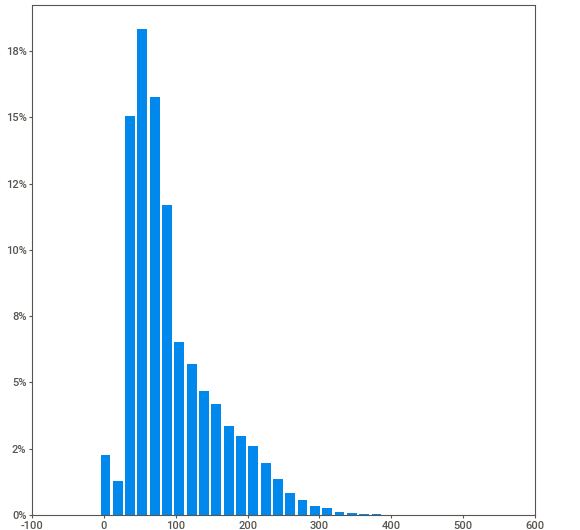
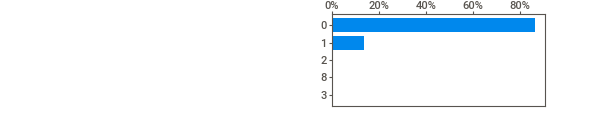
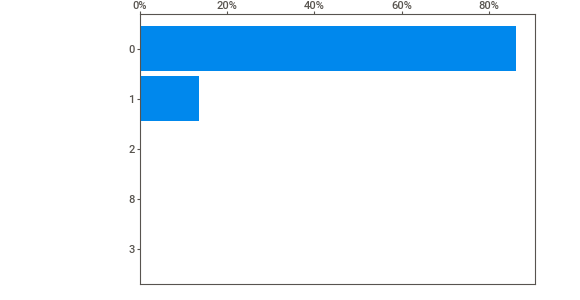
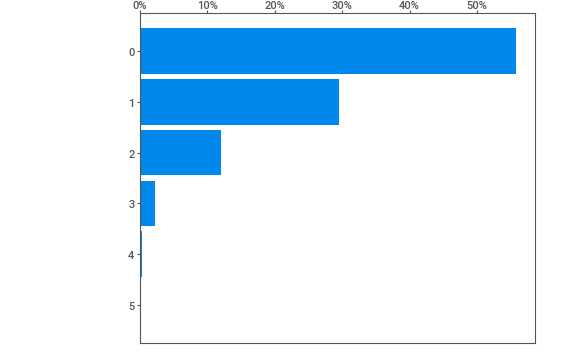
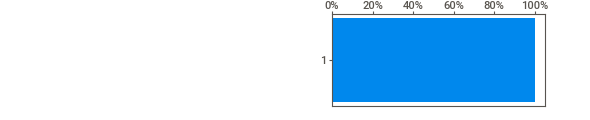
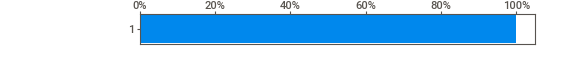
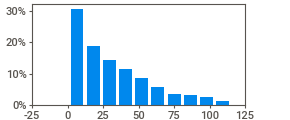
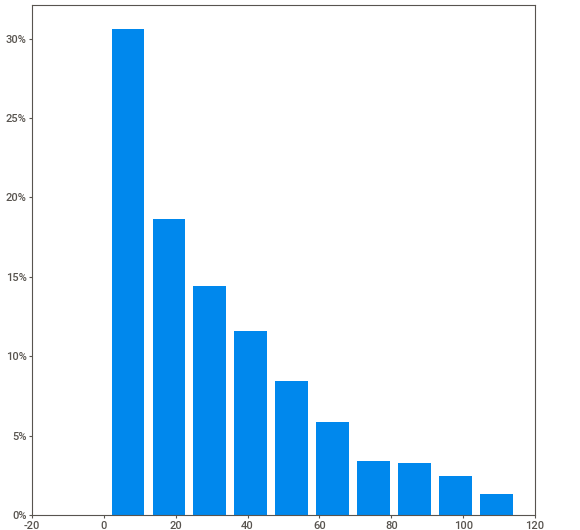
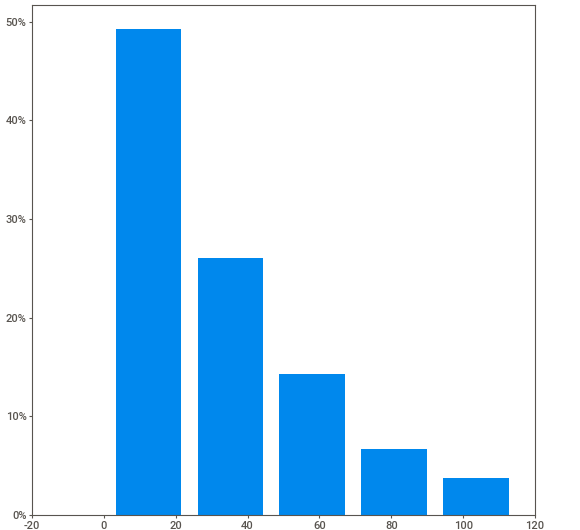
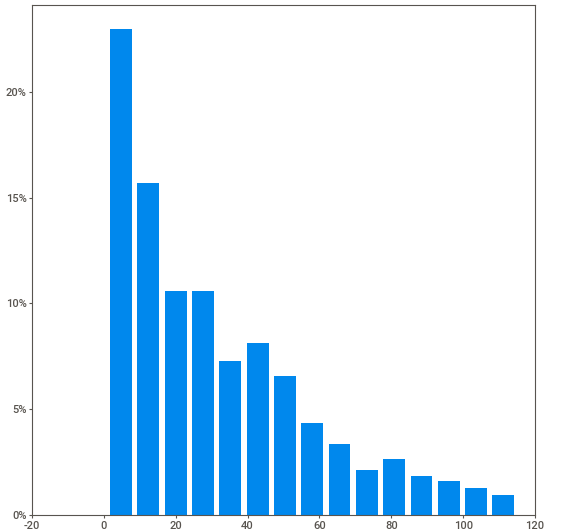
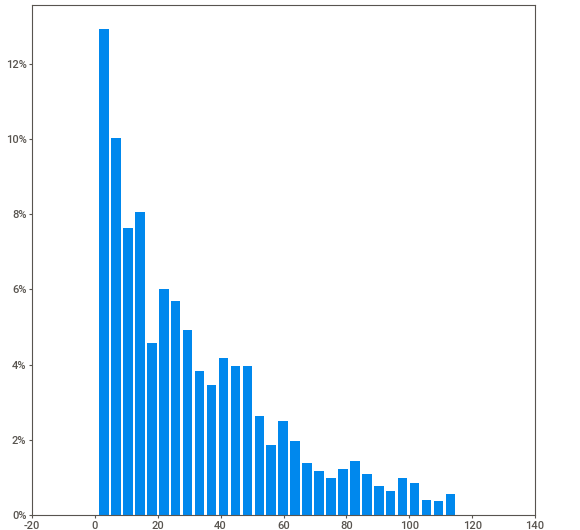
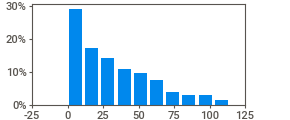
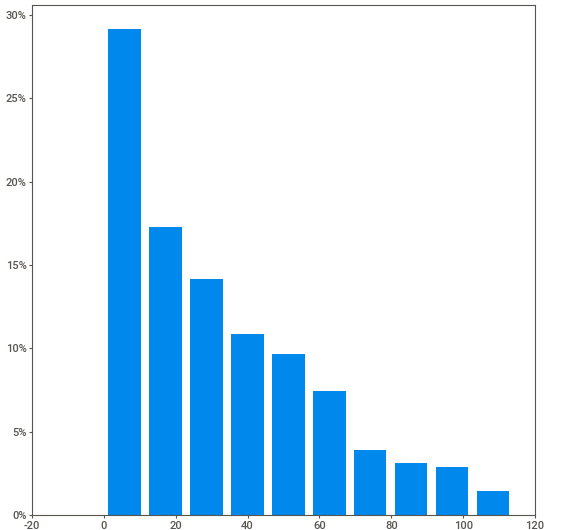
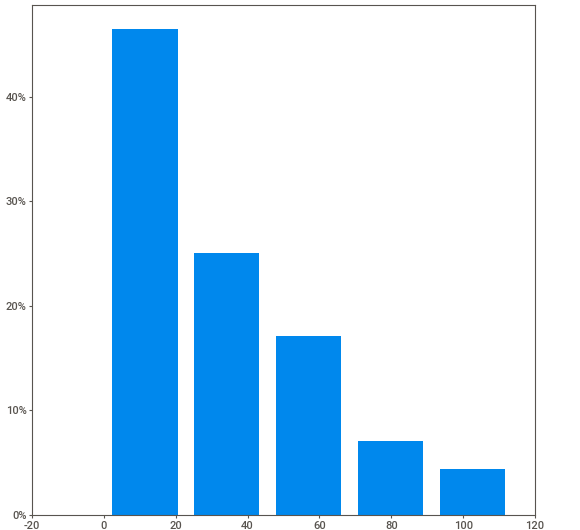
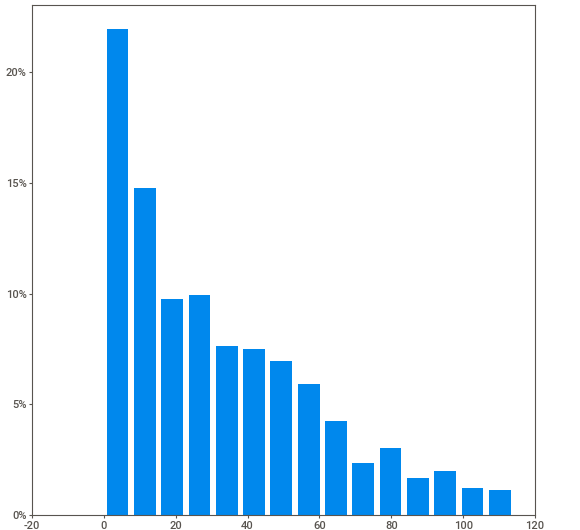
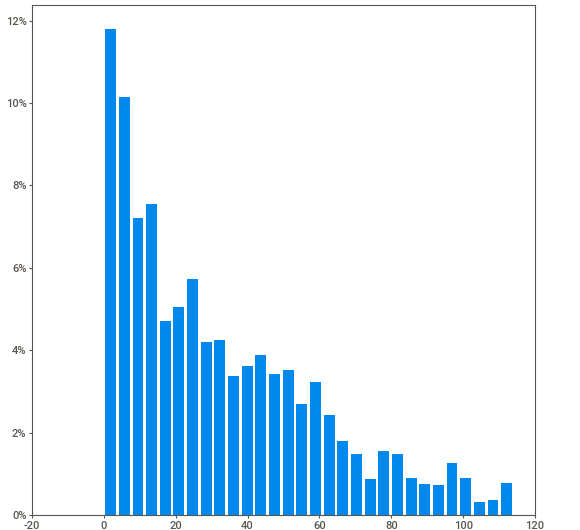
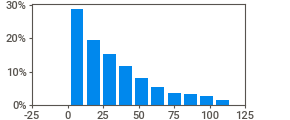
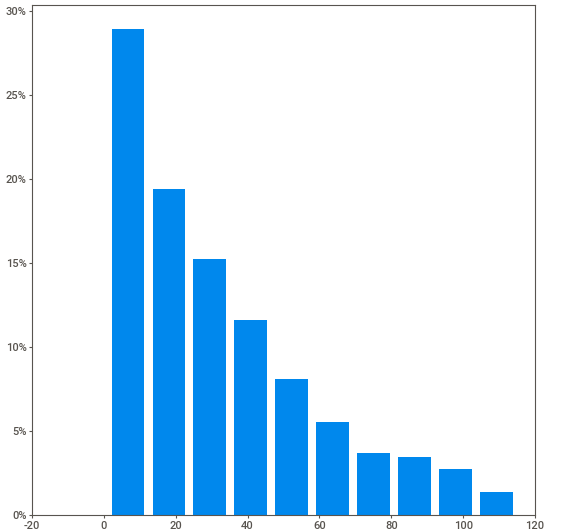
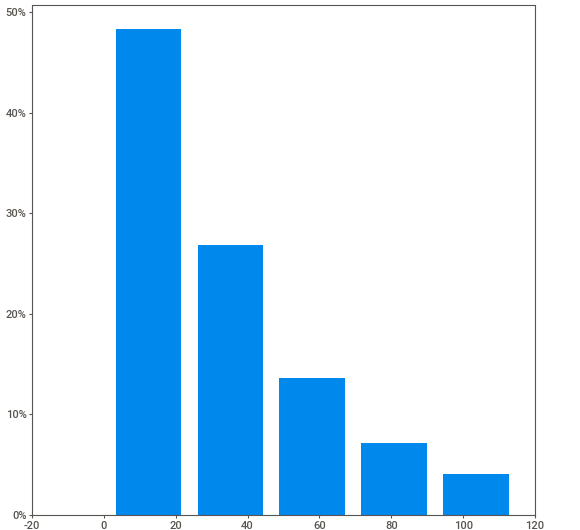
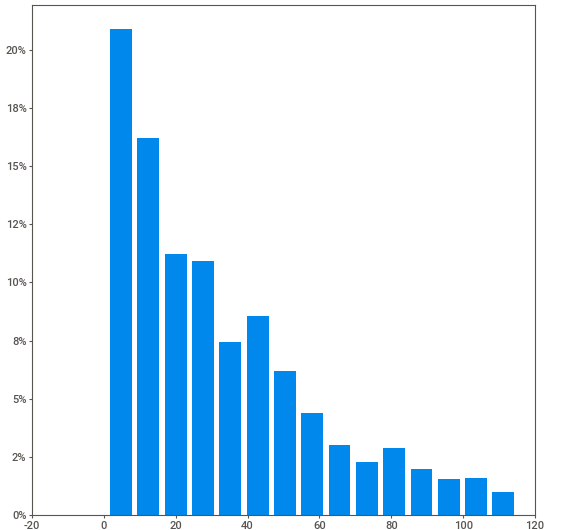
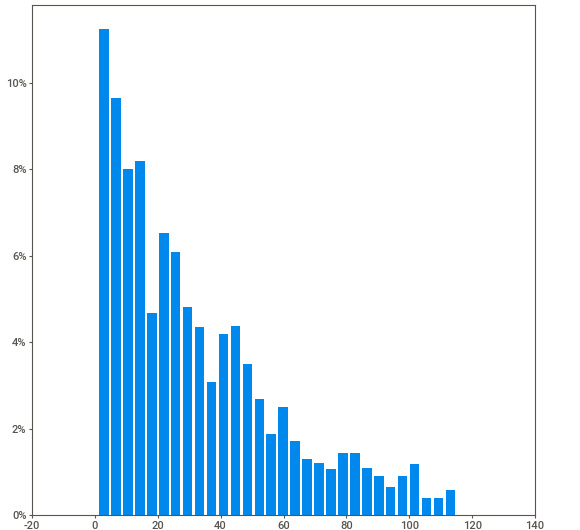
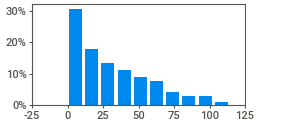
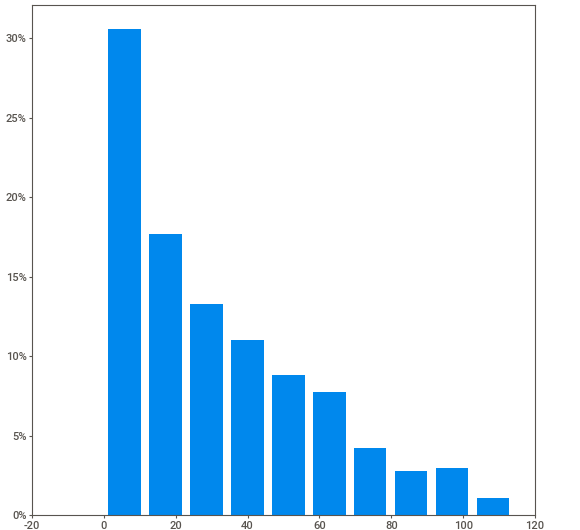
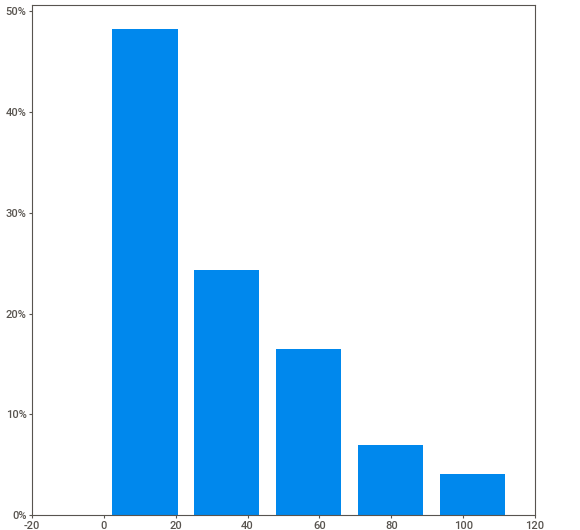
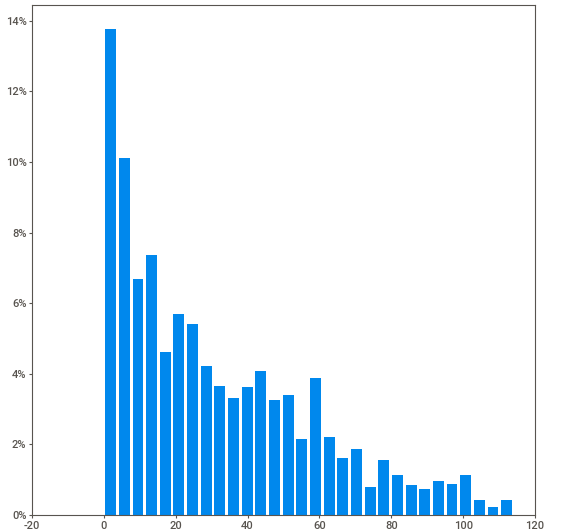
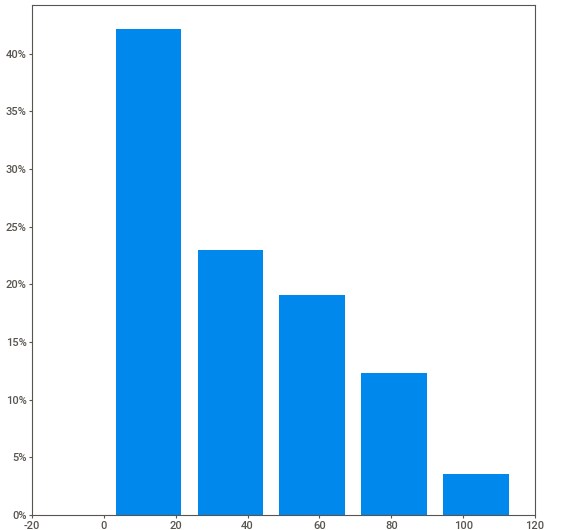
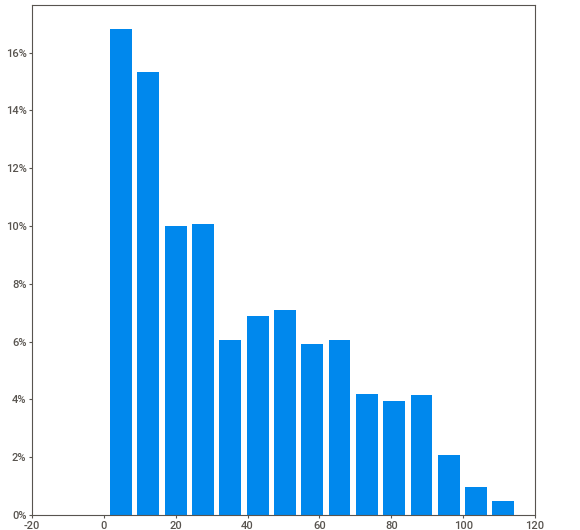
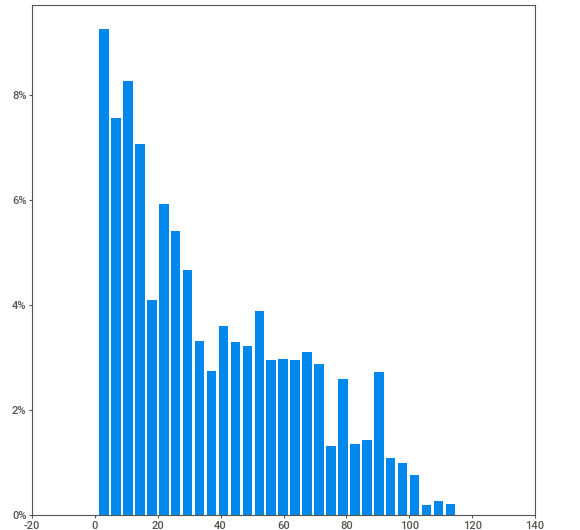
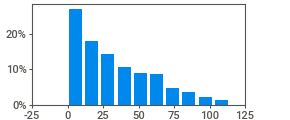
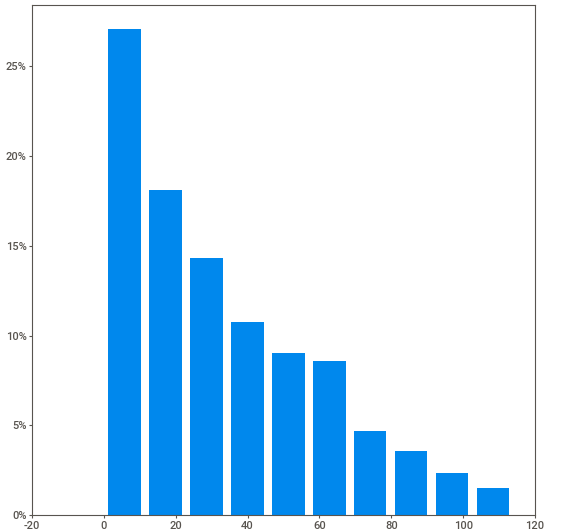
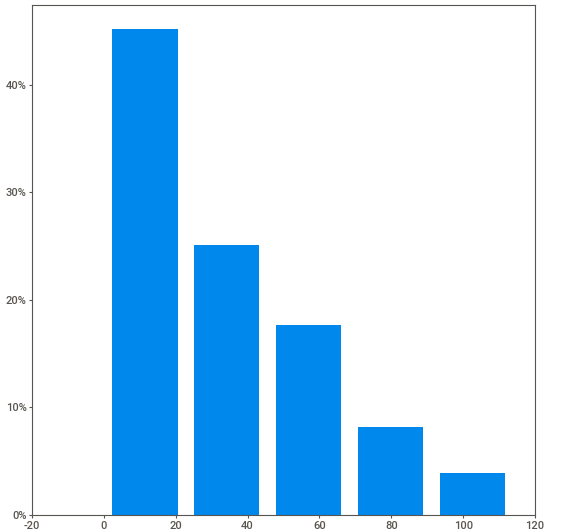
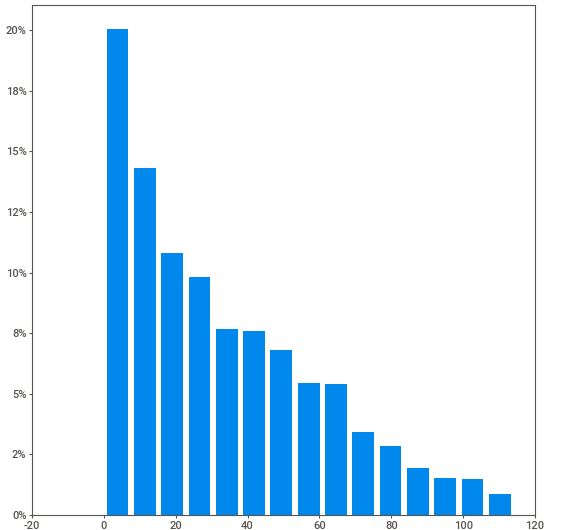
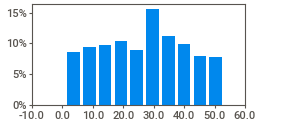
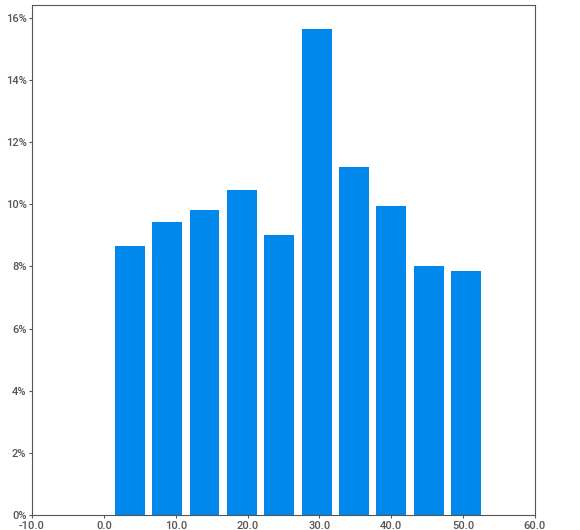
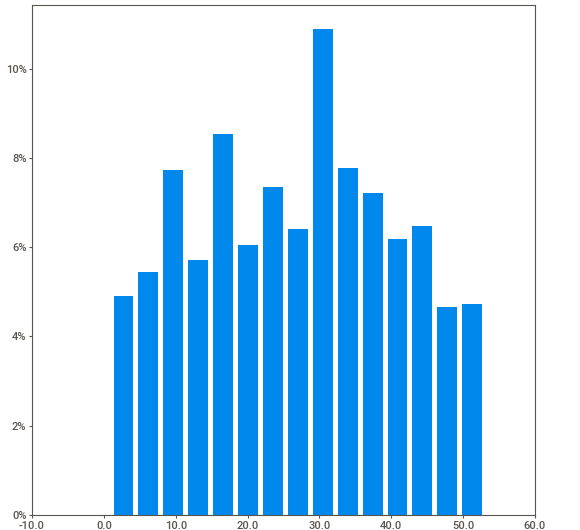
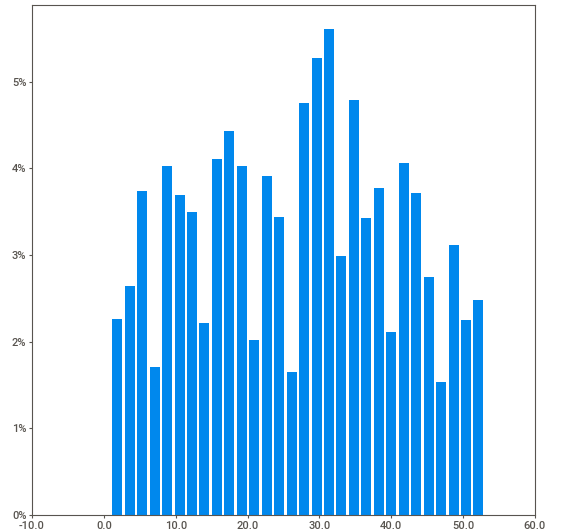
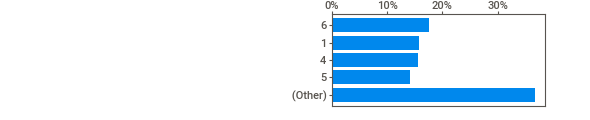
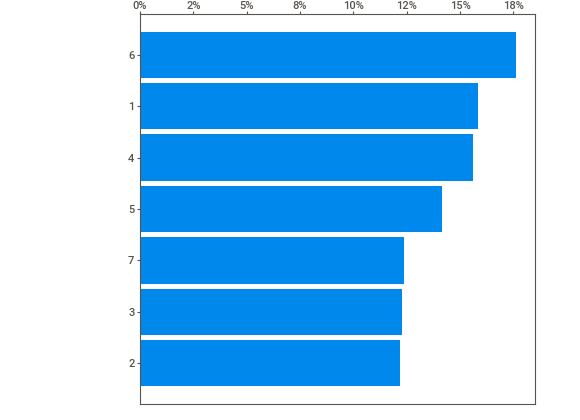
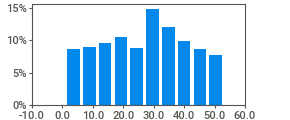
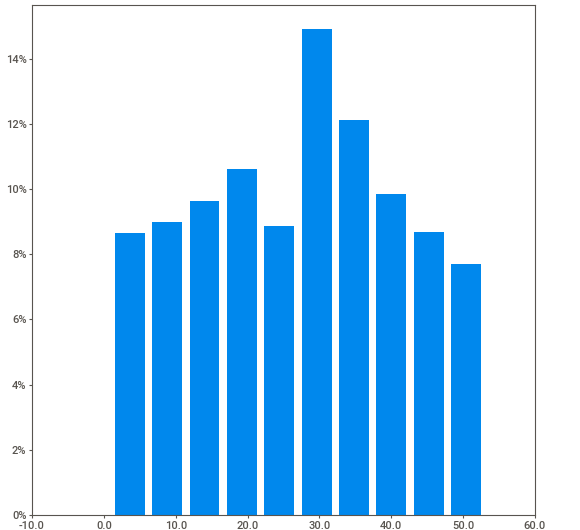
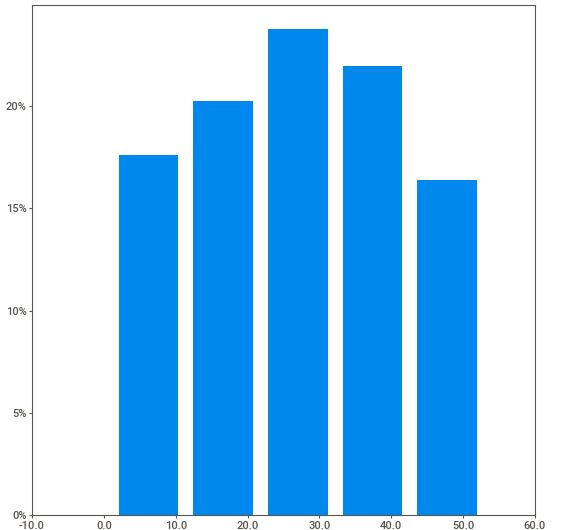
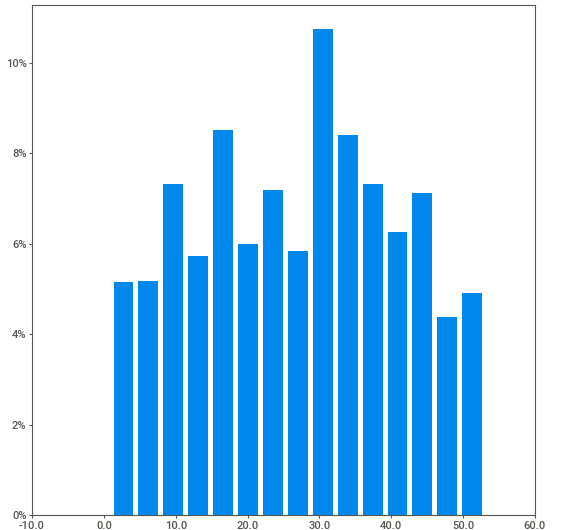
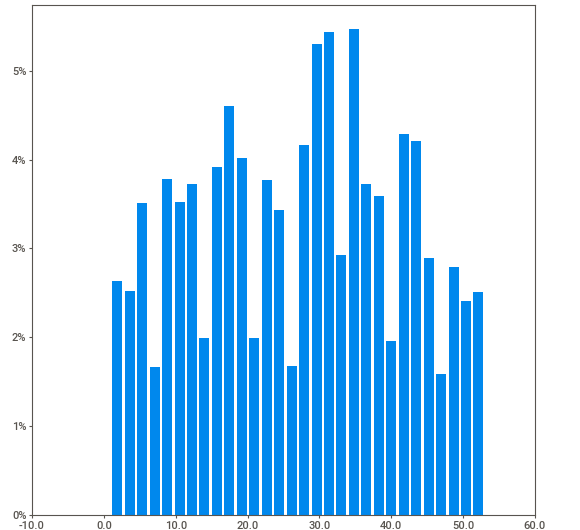
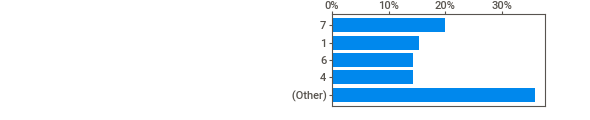
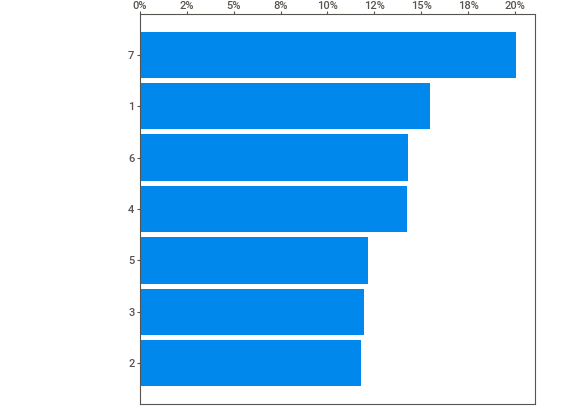
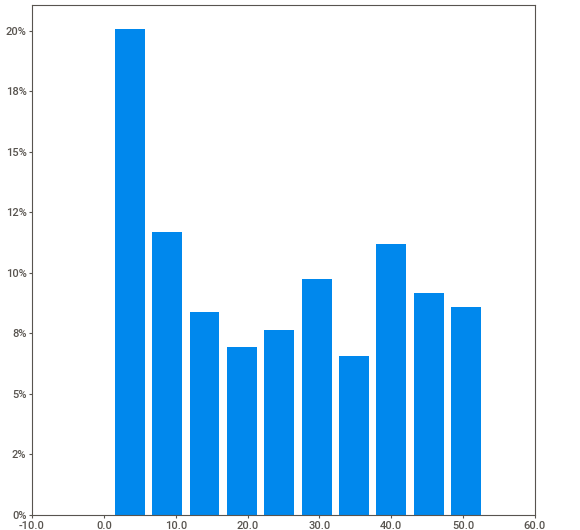
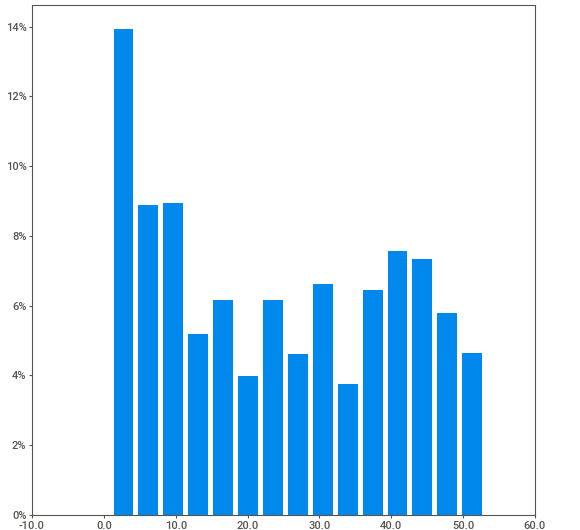
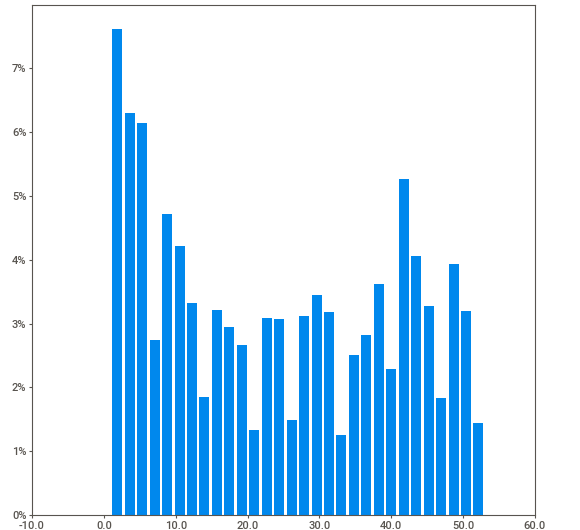
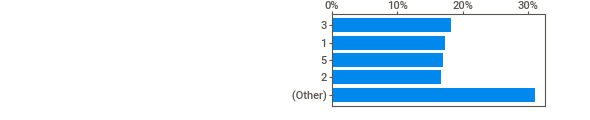
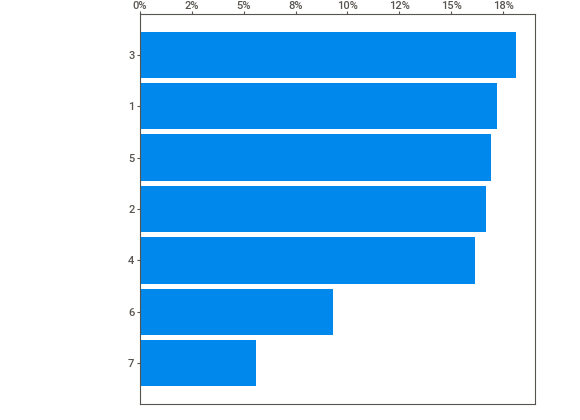

In [4]:
## Generate and display Sweetviz EDA report for Hotel 1
hotel = 1
hotel_filter = (df_data['HotelNumber'] == hotel)

report = sv.analyze(df_data[hotel_filter],pairwise_analysis = 'off')
report.show_notebook()

                                             |                                             | [  0%]   00:00 ->…


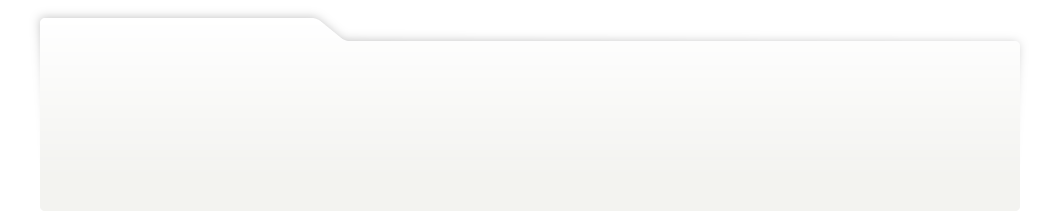
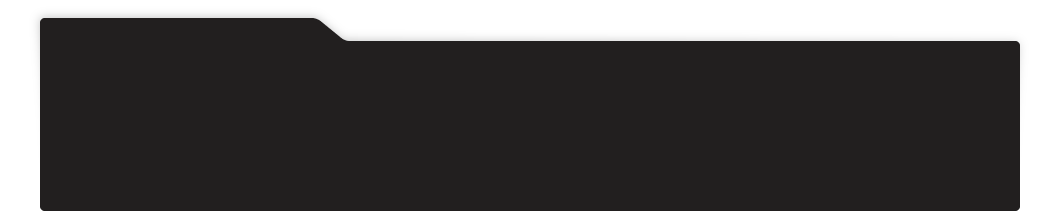
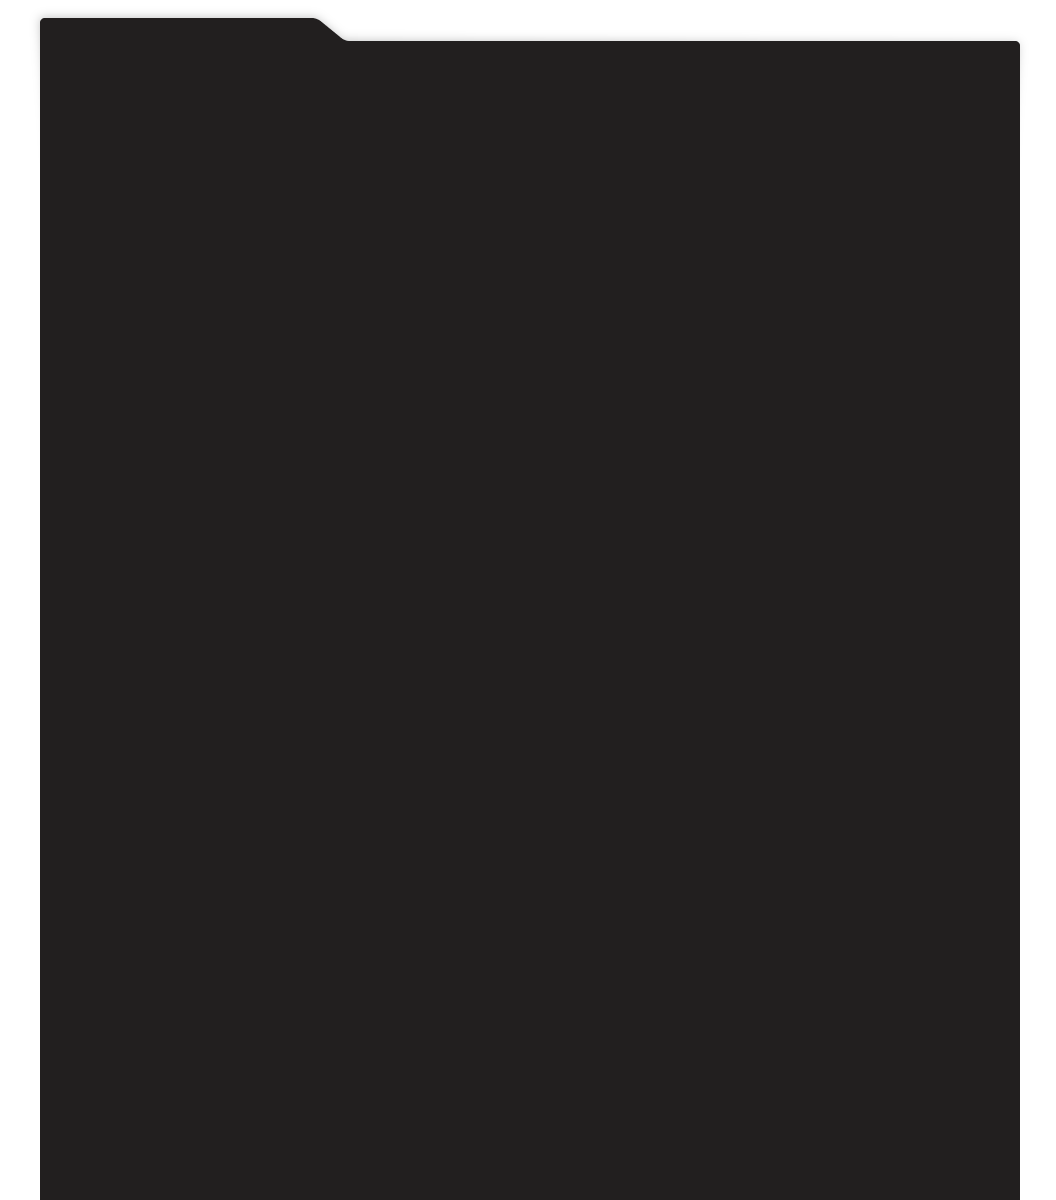
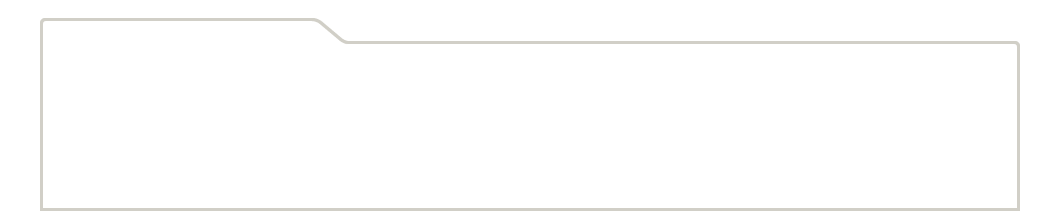
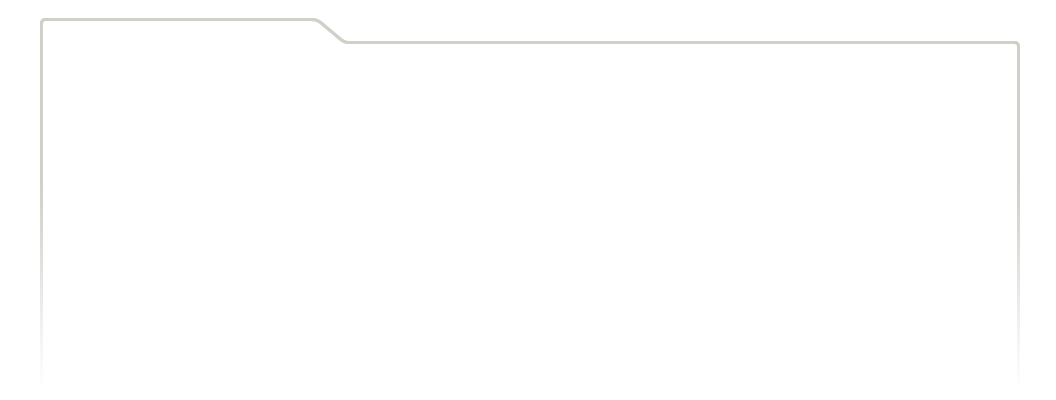
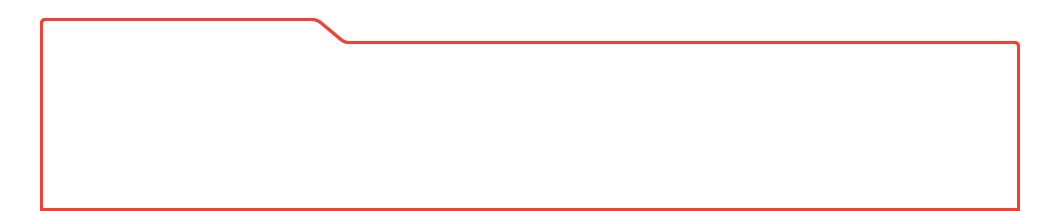
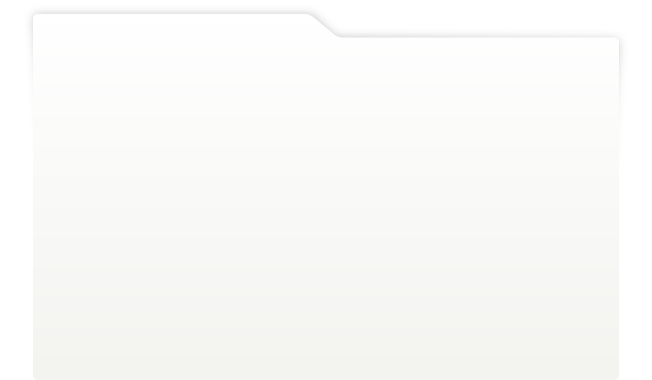
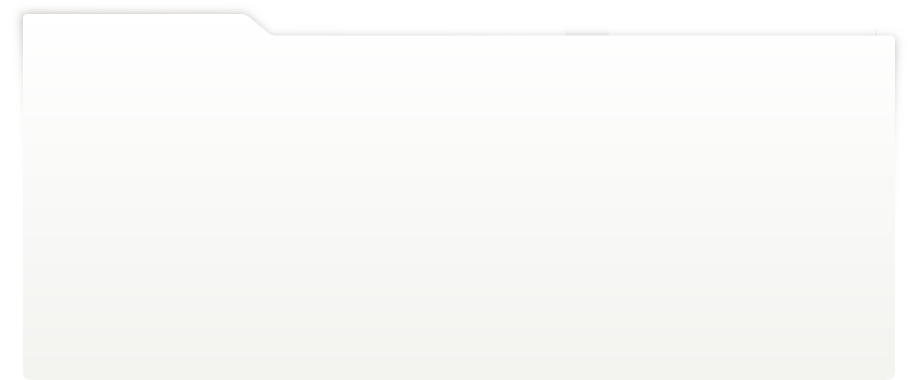
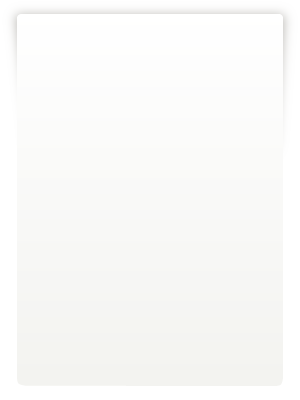
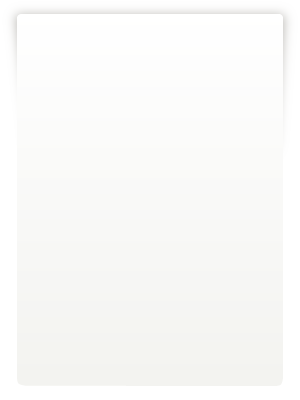
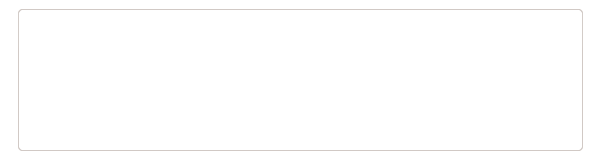
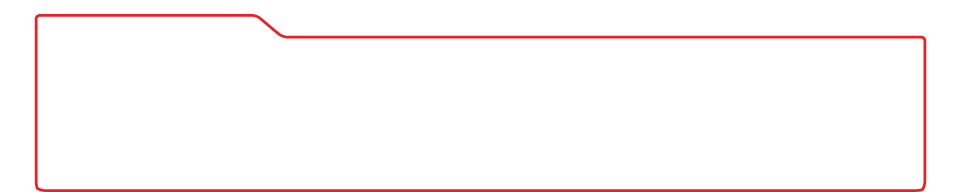
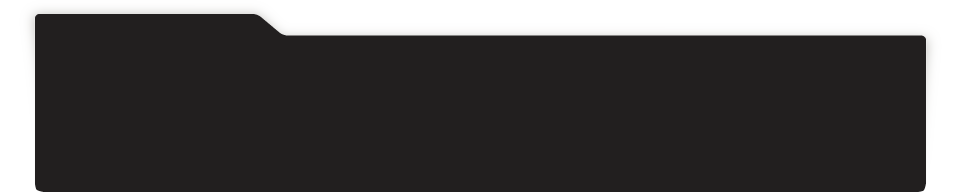
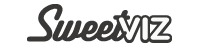
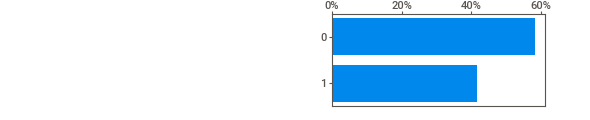
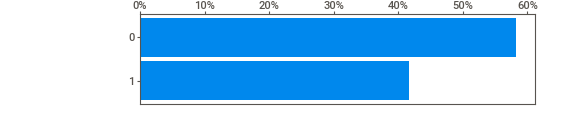
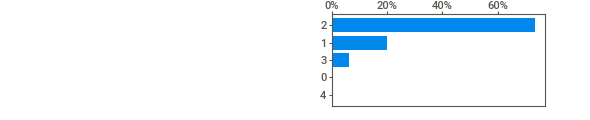
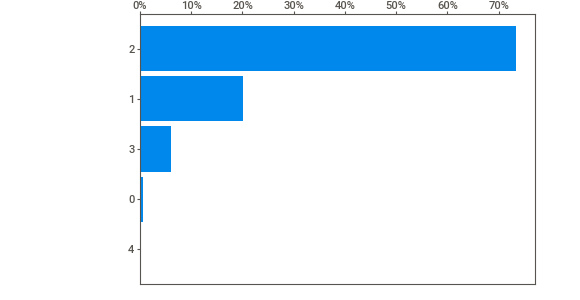
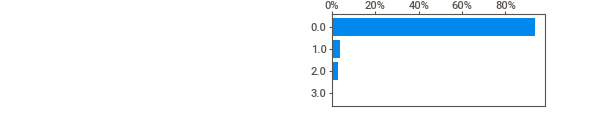
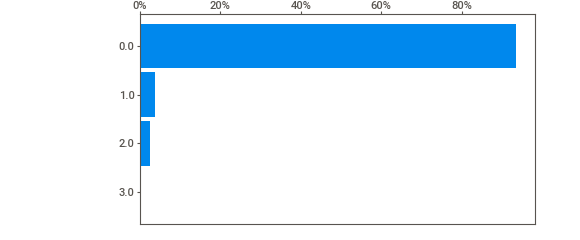
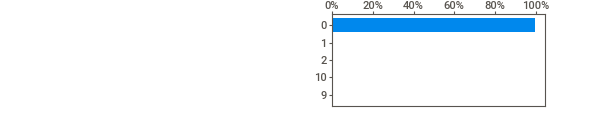
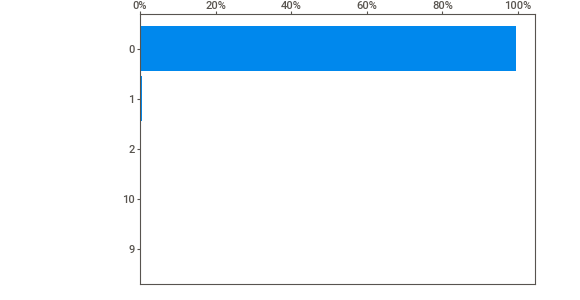
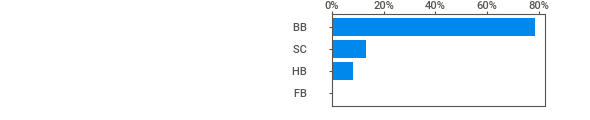
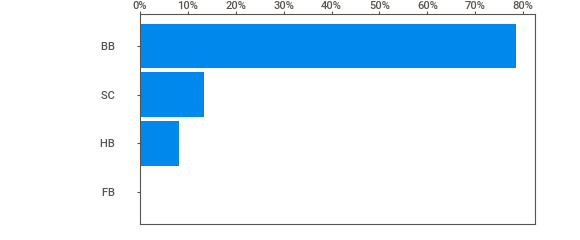
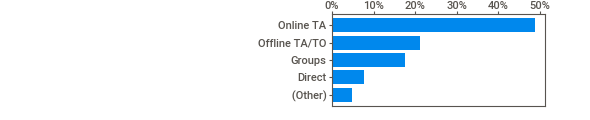
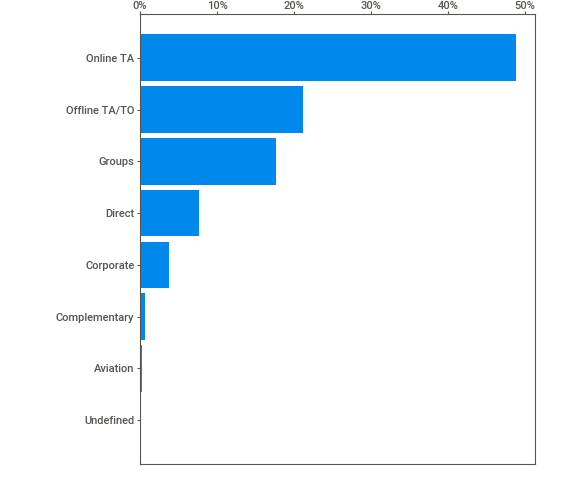
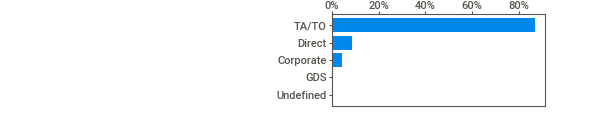
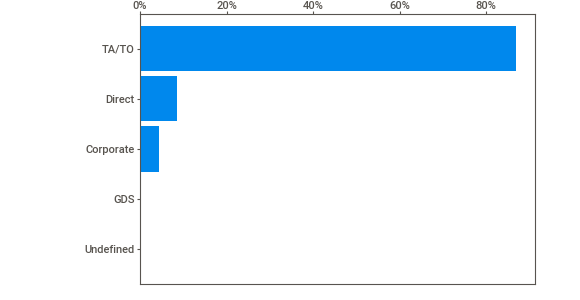
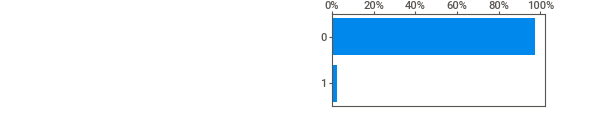
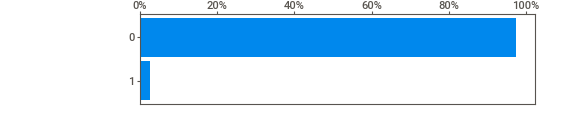
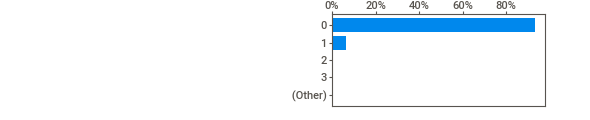
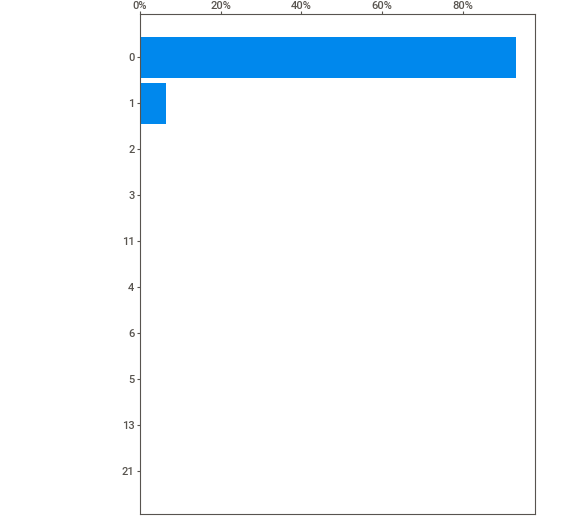
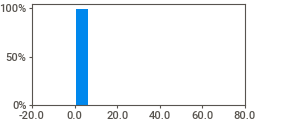
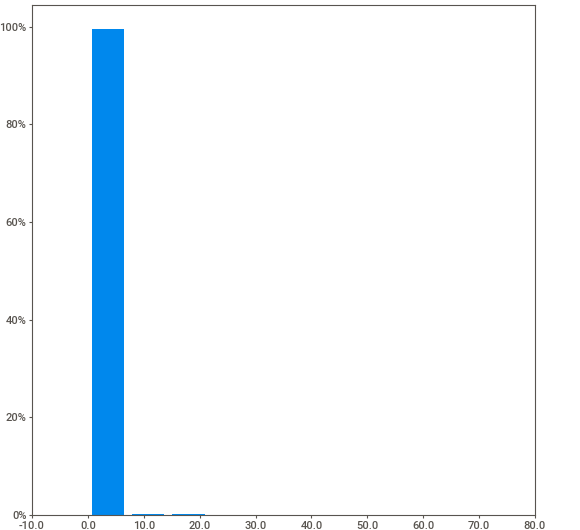
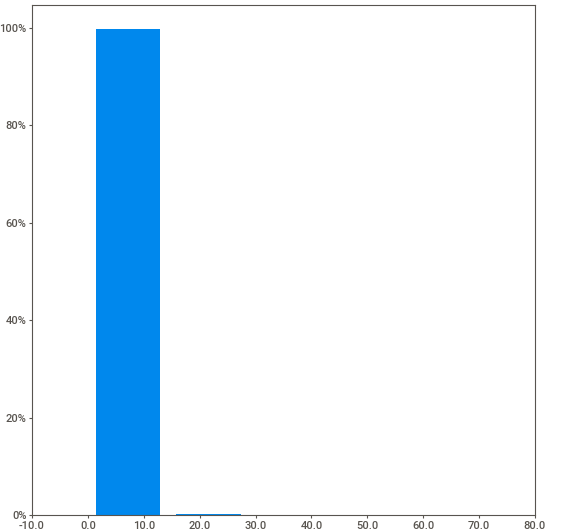
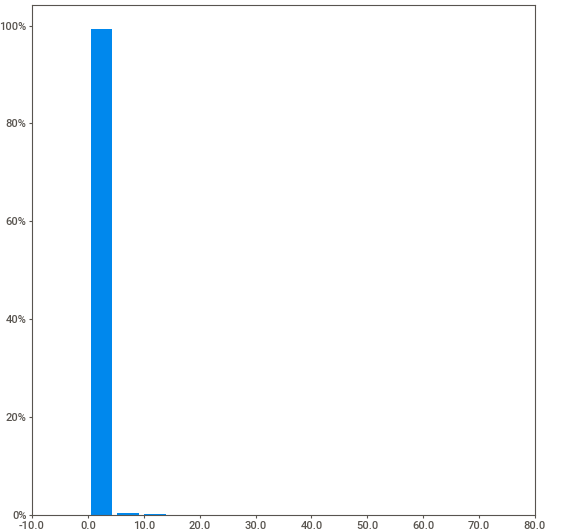
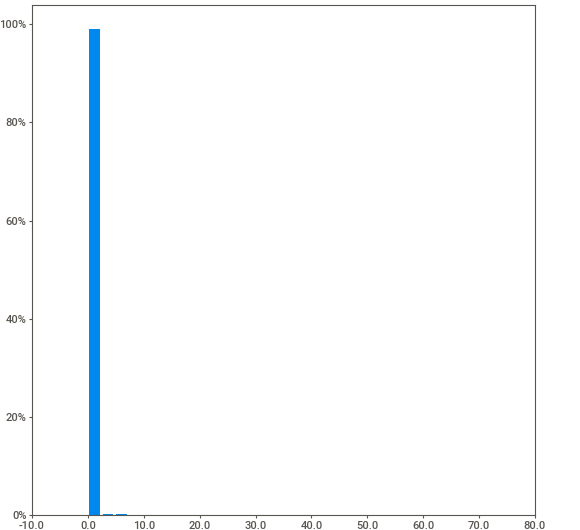
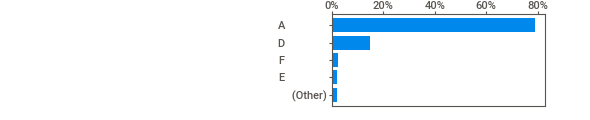
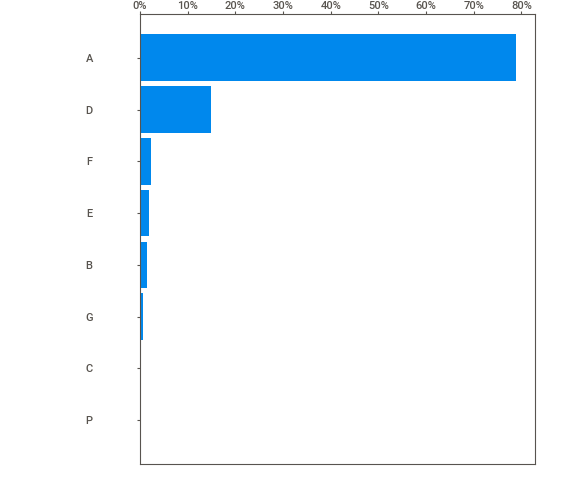
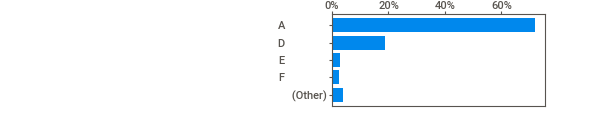
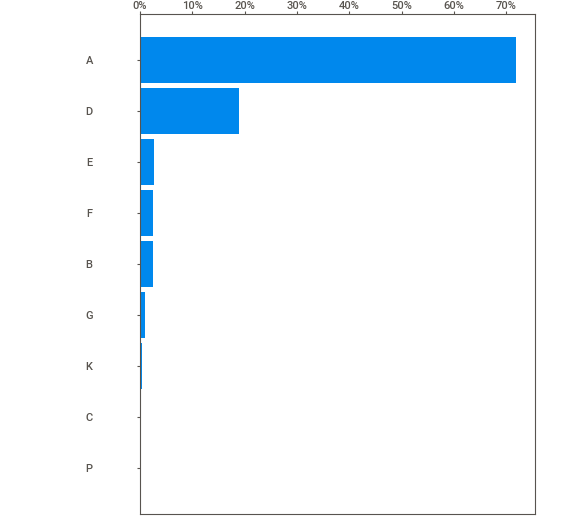
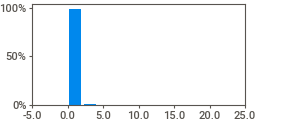
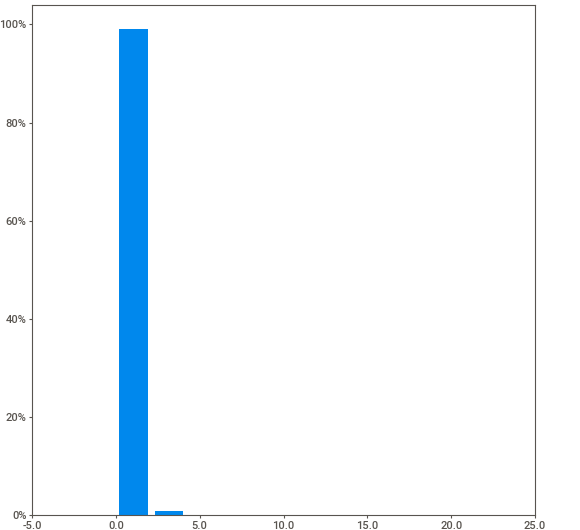
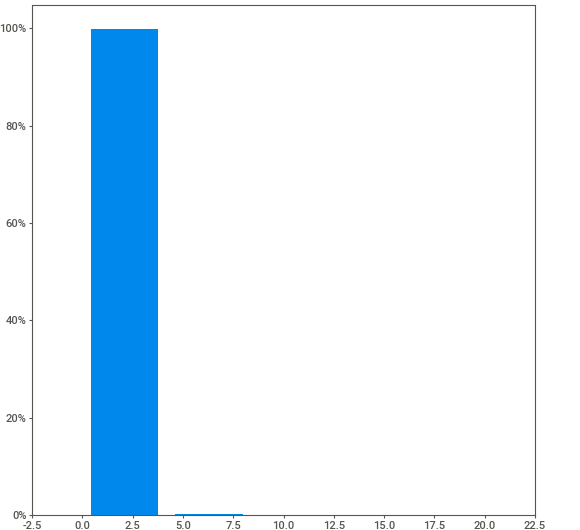
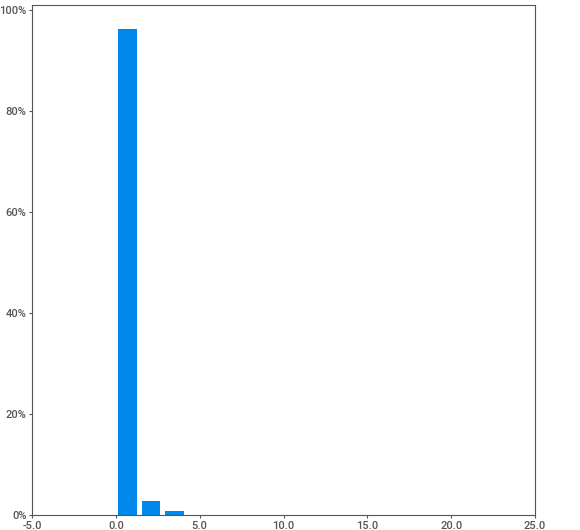
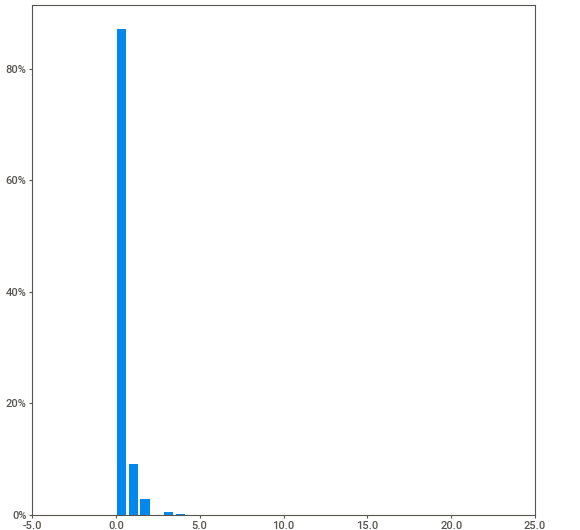
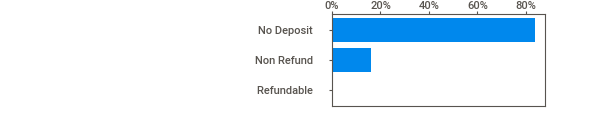
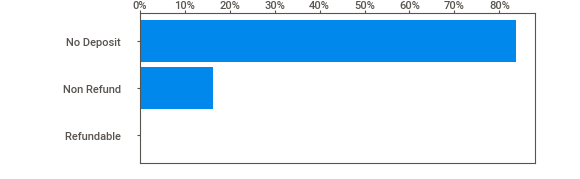
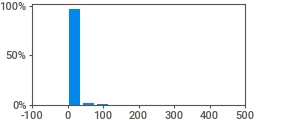
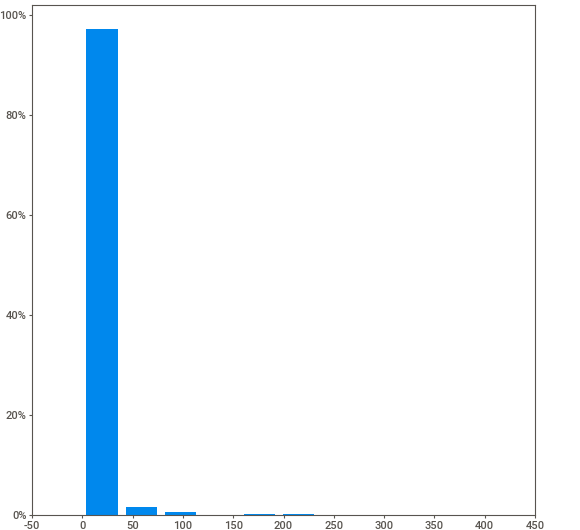
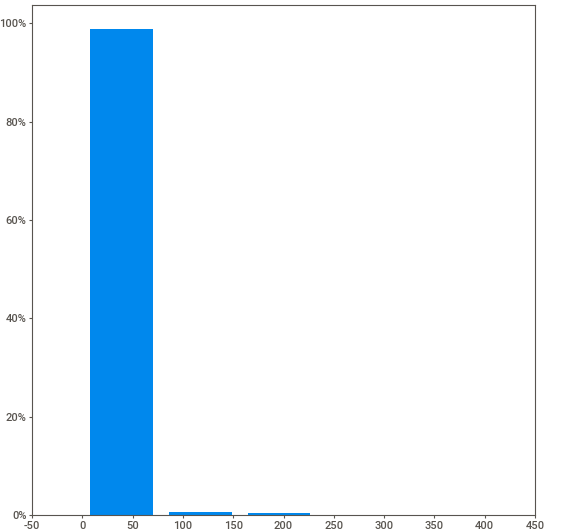
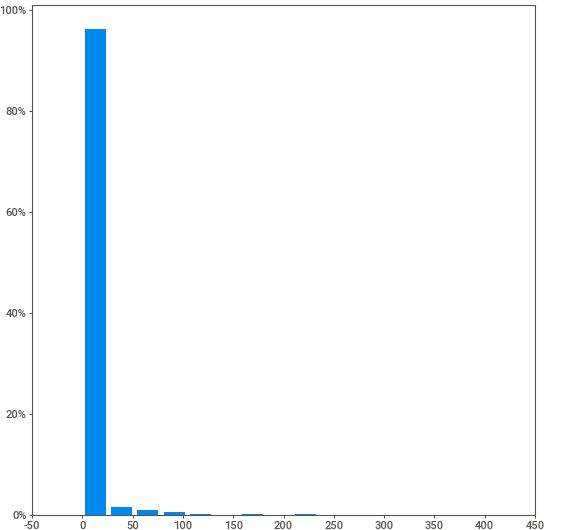
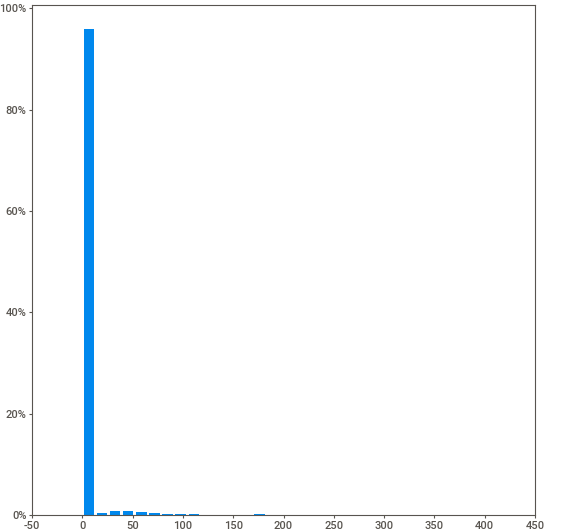
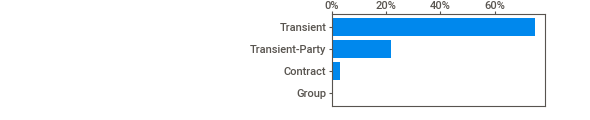
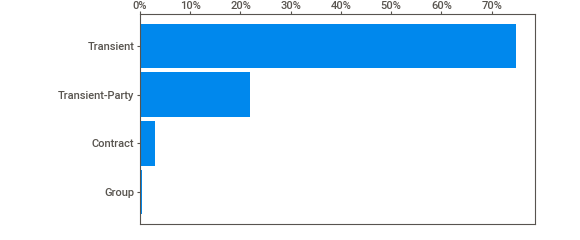
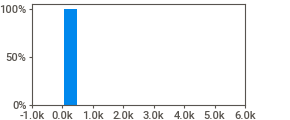
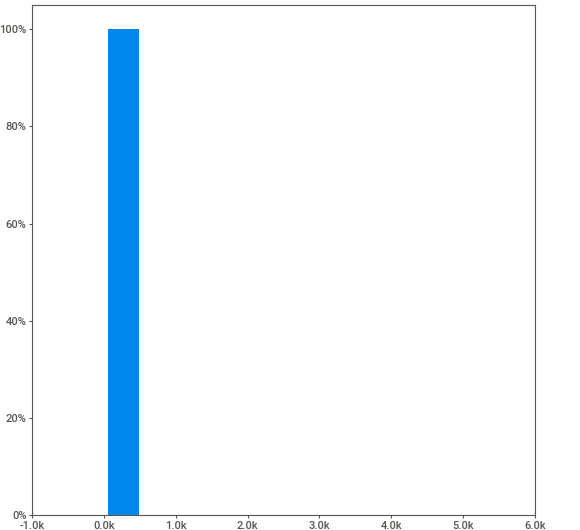
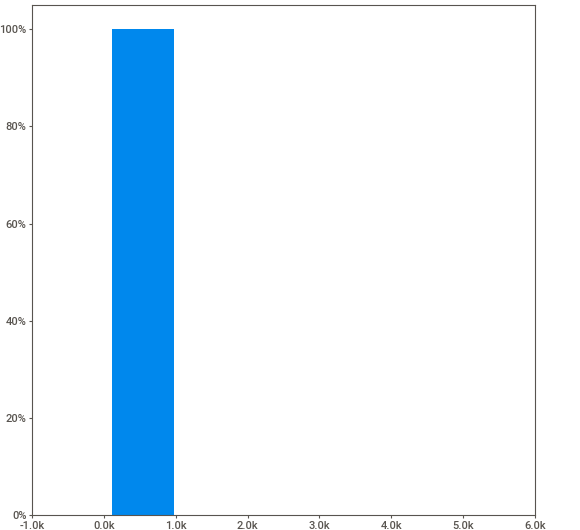
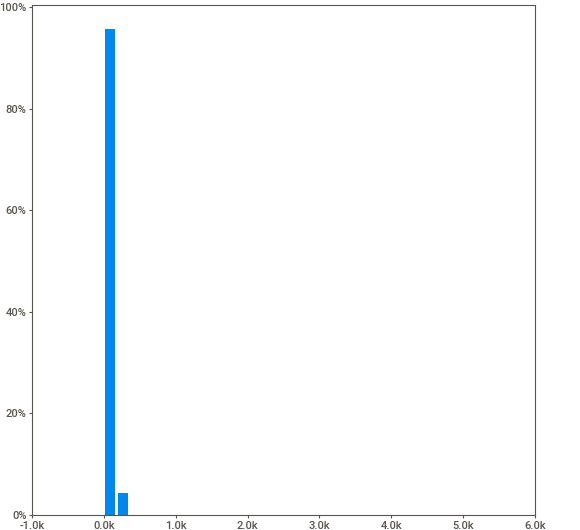
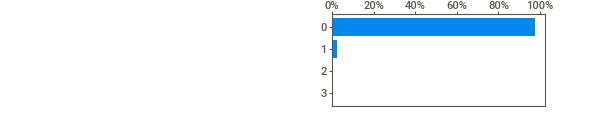
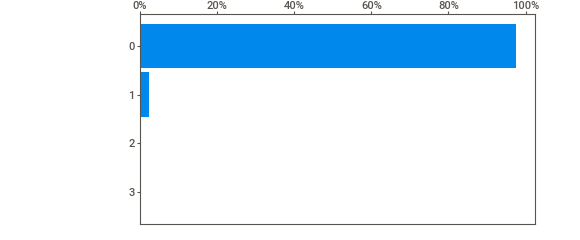
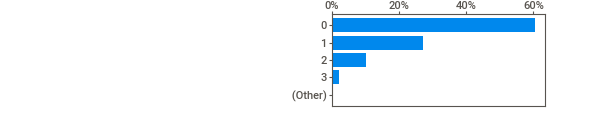
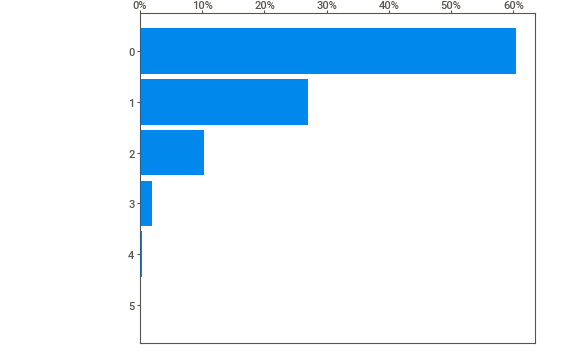
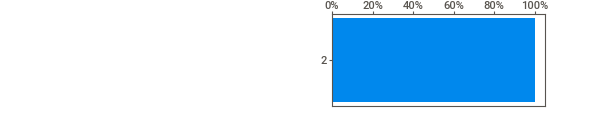
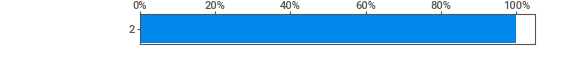
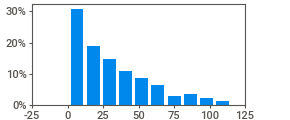
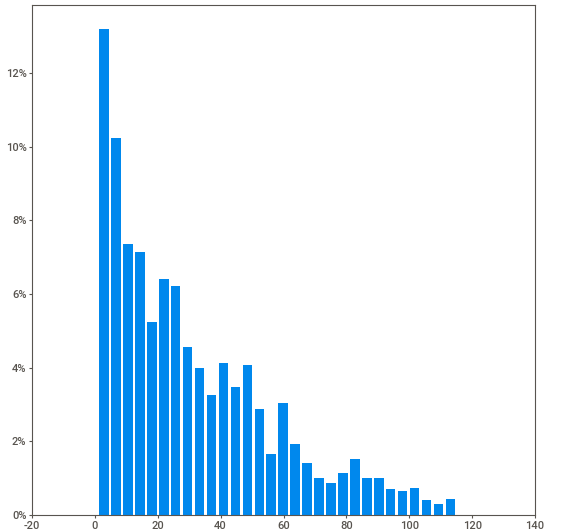
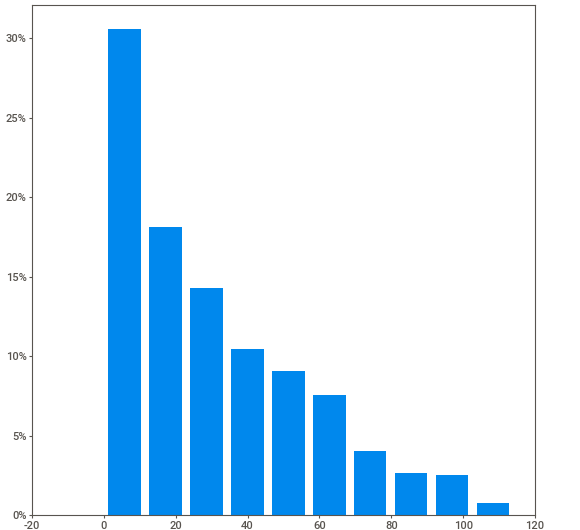
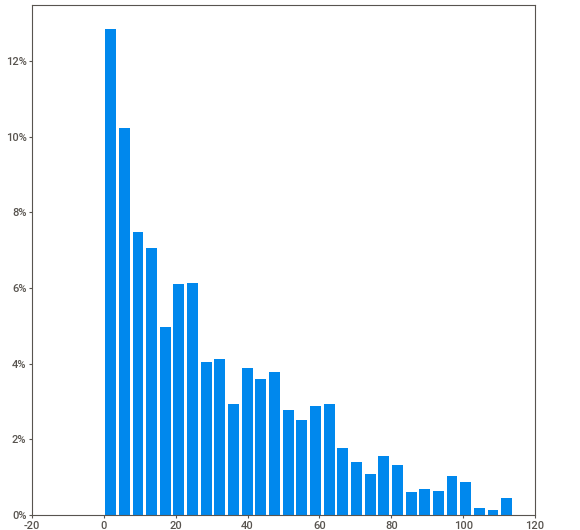
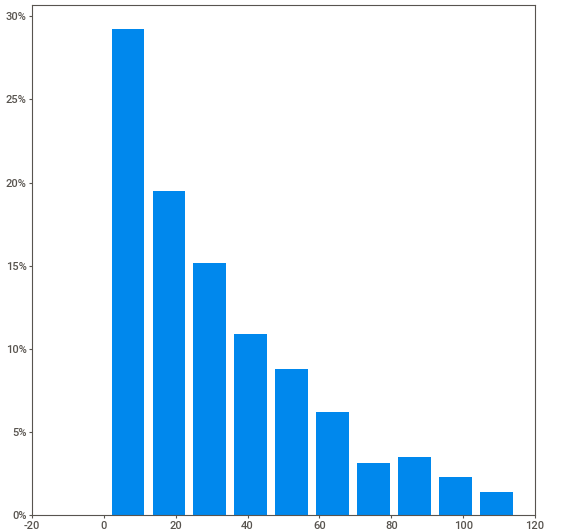
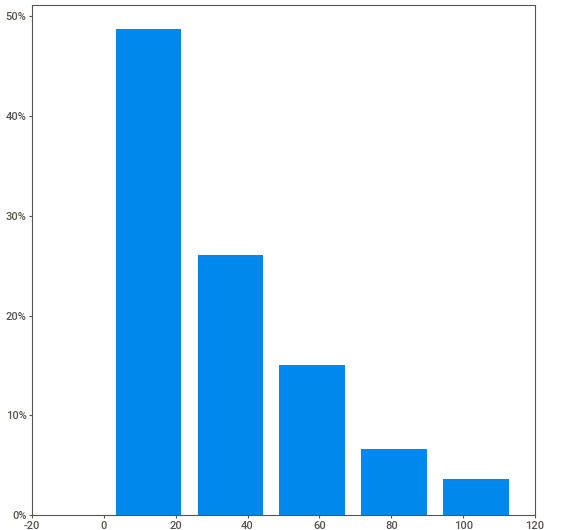
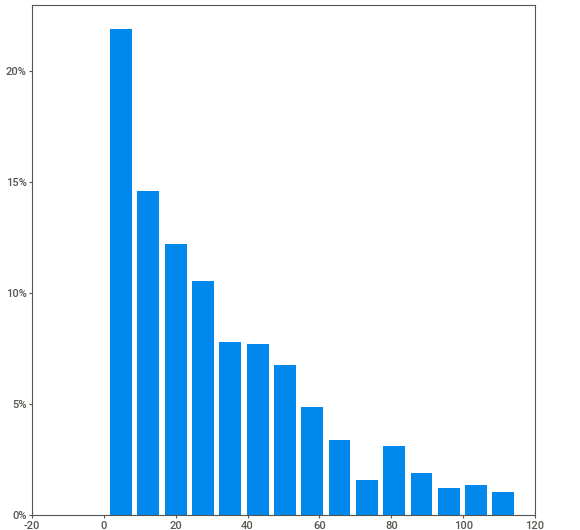
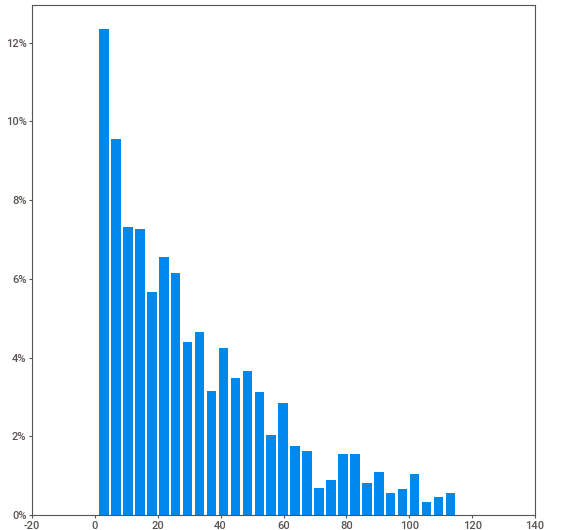
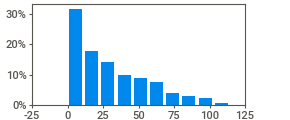
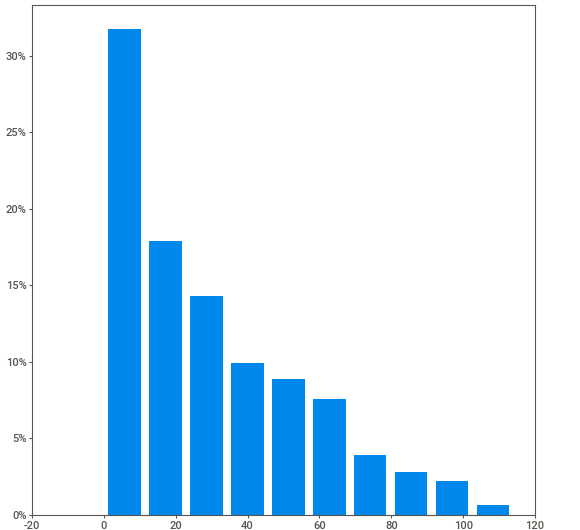
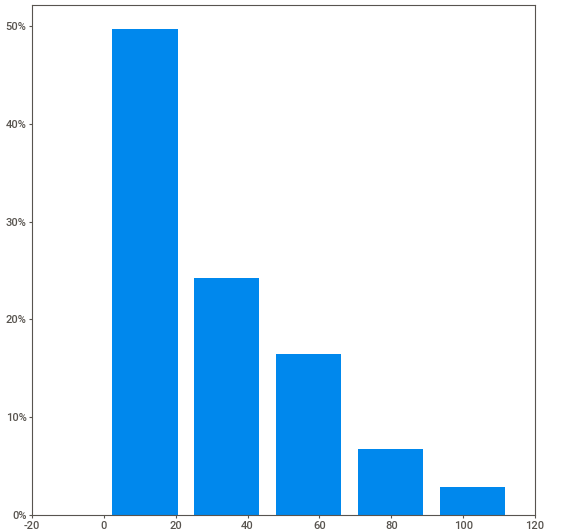
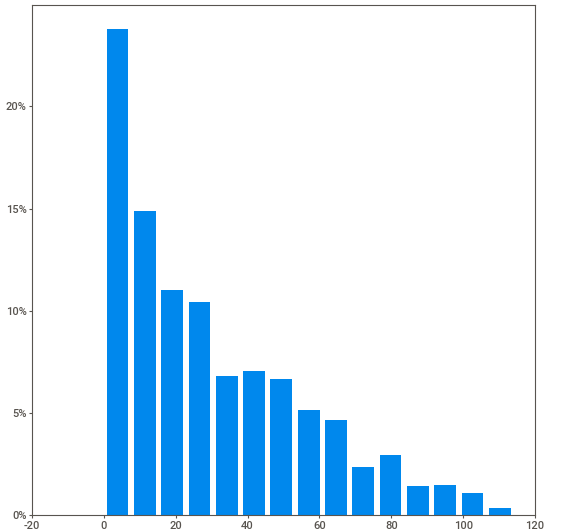
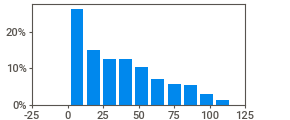
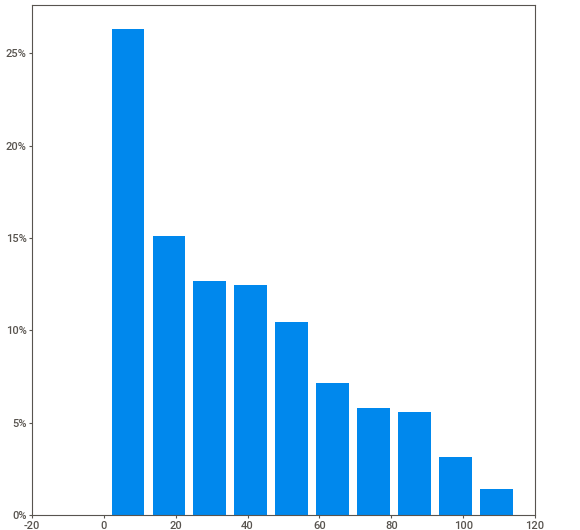
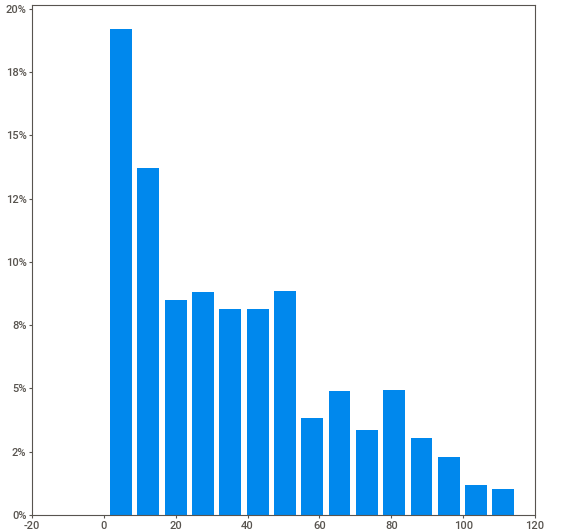
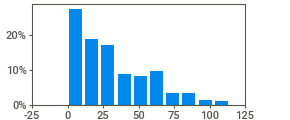
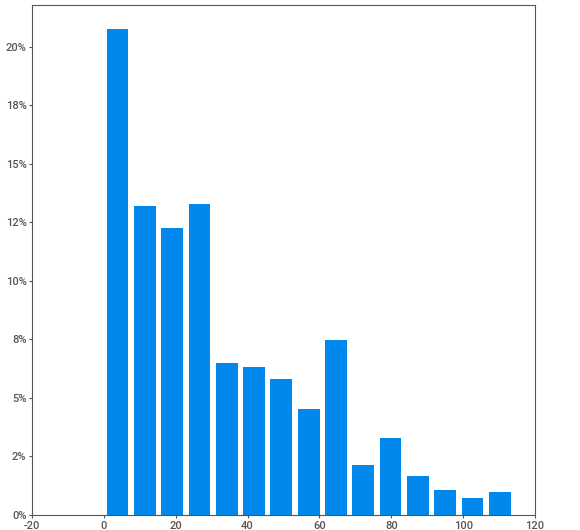
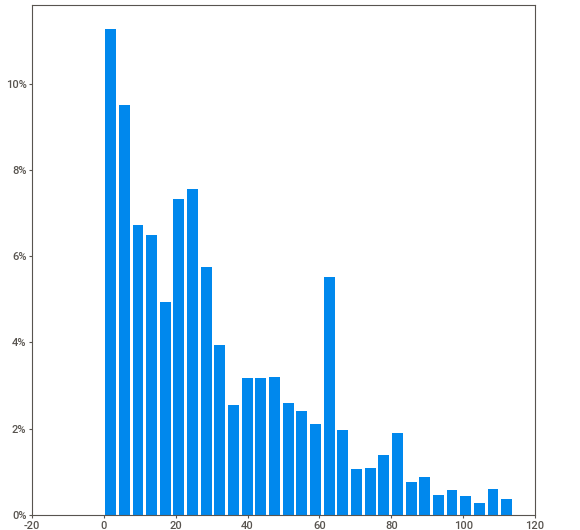
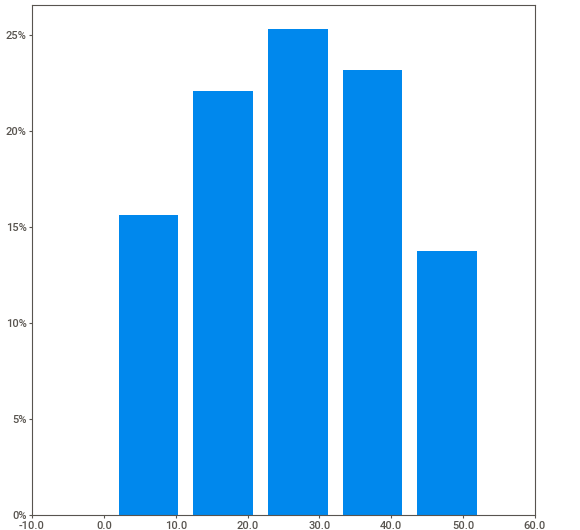
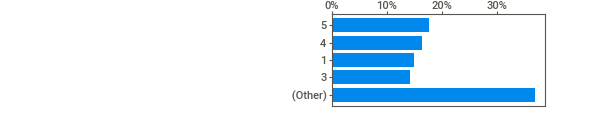
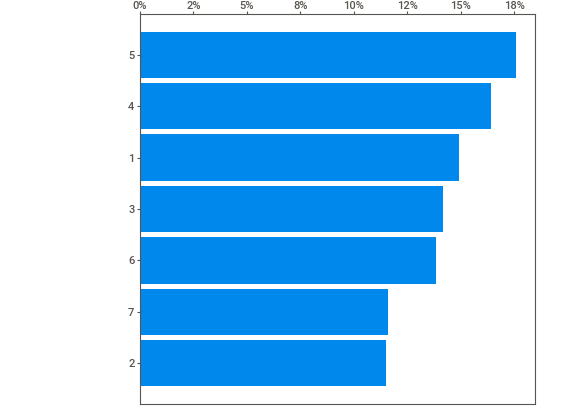
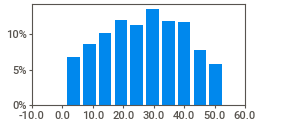
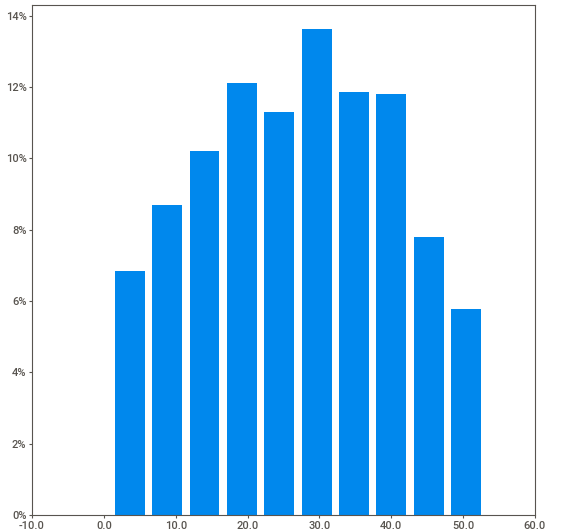
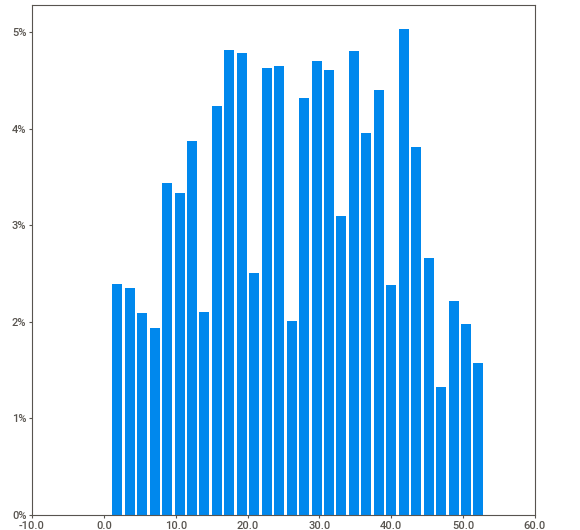
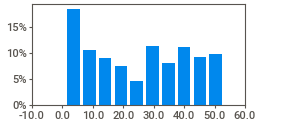
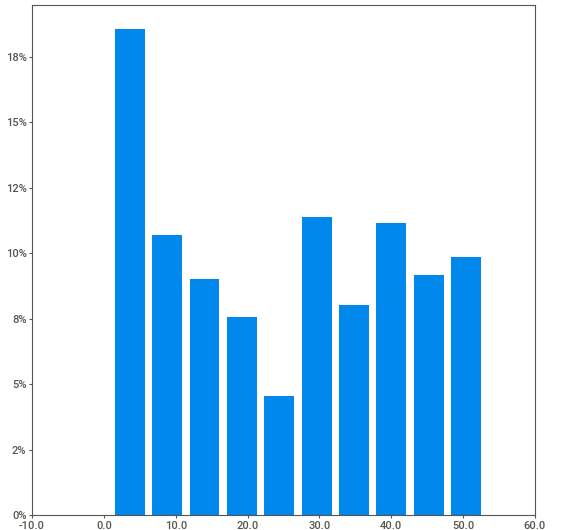
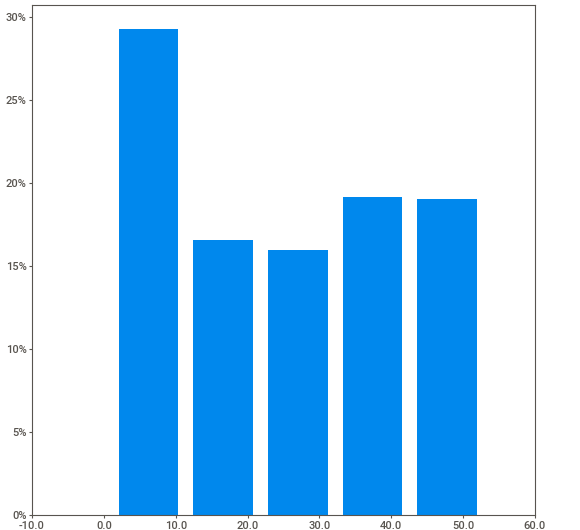
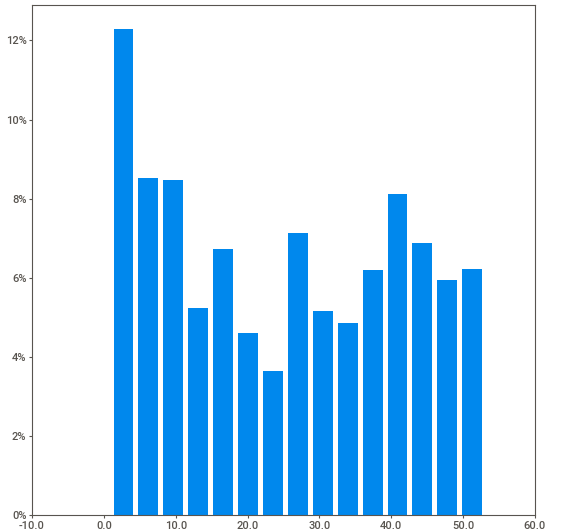
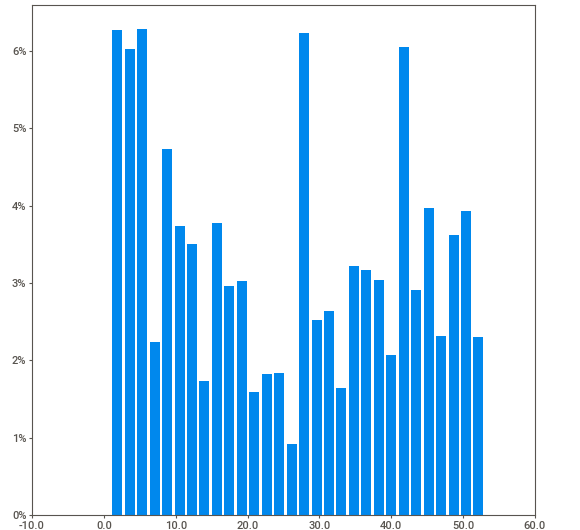
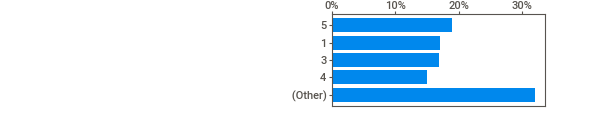
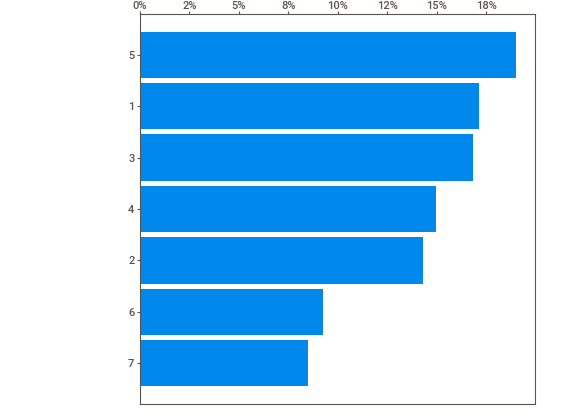

In [5]:
## Generate and display Sweetviz EDA report for Hotel 1
hotel = 2
hotel_filter = (df_data['HotelNumber'] == hotel)

report = sv.analyze(df_data[hotel_filter],pairwise_analysis = 'off')
report.show_notebook()

# Calculate Daily Occupancies

# Hotel 1

In [8]:
hotel = 1

hotel_filter = (df_data['HotelNumber'] == hotel)

df_data = df_data[hotel_filter]

df_data

IsCanceled  Adults  Children  Babies       Meal Country  MarketSegment  \
0               0       2      0.00       0  BB            PRT         Direct   
1               0       2      0.00       0  BB            PRT         Direct   
2               0       1      0.00       0  BB            GBR         Direct   
3               0       1      0.00       0  BB            GBR      Corporate   
4               0       2      0.00       0  BB            GBR      Online TA   
...           ...     ...       ...     ...        ...     ...            ...   
40055           0       2      1.00       0  BB            GBR  Offline TA/TO   
40056           0       2      0.00       0  BB            IRL         Direct   
40057           0       2      0.00       0  BB            IRL         Direct   
40058           0       2      0.00       0  HB            GBR  Offline TA/TO   
40059           0       2      0.00       0  HB            DEU  Offline TA/TO   

      DistributionChannel  IsRepeatedGuest  PreviousCancellations  \
0                  Direct                0                      0   
1                  Direct                0                      0   
2                  Direct                0                      0   
3               Corporate                0                      0   
4                   TA/TO                0                      0   
...                   ...              ...                    ...   
40055               TA/TO                0                      0   
40056              Direct                0                      0   
40057              Direct                0                      0   
40058               TA/TO                0                      0   
40059               TA/TO                0                      0   

       PreviousBookingsNotCanceled  ReservedRoomType  AssignedRoomType  \
0                                0  C                 C                  
1                                0  C                 C                  
2                                0  A                 C                  
3                                0  A                 A                  
4                                0  A                 A                  
...                            ...               ...               ...   
40055                            0  A                 A                  
40056                            0  E                 E                  
40057                            0  E                 E                  
40058                            0  D                 D                  
40059                            0  A                 A                  

       BookingChanges      DepositType        Agent      Company  \
0                   3  No Deposit              NULL         NULL   
1                   4  No Deposit              NULL         NULL   
2                   0  No Deposit              NULL         NULL   
3                   0  No Deposit               304         NULL   
4                   0  No Deposit               240         NULL   
...               ...              ...          ...          ...   
40055               1  No Deposit               143         NULL   
40056               0  No Deposit               250         NULL   
40057               0  No Deposit               250         NULL   
40058               0  No Deposit                40         NULL   
40059               0  No Deposit                69         NULL   

       DaysInWaitingList     CustomerType    ADR  RequiredCarParkingSpaces  \
0                      0        Transient   0.00                         0   
1                      0        Transient   0.00                         0   
2                      0        Transient  75.00                         0   
3                      0        Transient  75.00                         0   
4                      0        Transient  98.00                         0   
...                  ...       

In [10]:
min_date = df_data['ArrivalDate'].min()
max_date = df_data['DepartureDate'].max()

print(f'The earliest date is: {min_date}.\nThe latest date is: {max_date}.')

KeyError: 'ArrivalDate'

### ChatGPT-Generated Code

#### Walkthrough of Code Below

Certainly! Let's break down the corrected code into its key steps, explaining each part and its purpose in calculating the number of active hotel reservations for each date:

**1. Sample Data Creation**

```python
df_data = pd.DataFrame({
    'Arrival_Date': ['2023-01-01', '2023-01-02', '2023-01-05', '2023-01-05'],
    'Departure_Date': ['2023-01-04', '2023-01-03', '2023-01-06', '2023-01-07']
})
```
- This step initializes `df_data`, a pandas DataFrame with two columns: `Arrival_Date` and `Departure_Date`. Each row represents a reservation with its arrival and departure dates.

**2. Convert Dates to Datetime Format**

```python
df_data['Arrival_Date'] = pd.to_datetime(df_data['Arrival_Date'])
df_data['Departure_Date'] = pd.to_datetime(df_data['Departure_Date'])
```
- Converts the date columns from strings (or any other format they might be in) to pandas datetime objects, allowing for date arithmetic and other time-series operations.

**3. Generate Counts for Arrivals and Departures**

```python
arrivals = df_data['Arrival_Date'].value_counts().rename('count')
departures = df_data['Departure_Date'].value_counts().rename('count')
```
- Counts how many reservations start (`arrivals`) and end (`departures`) on each date. The `value_counts()` method tallies occurrences of each date, and `rename('count')` changes the Series name to `'count'`, which aids in clarity for later operations.

**4. Combine Arrival and Departure Counts**

```python
df_counts = pd.concat([arrivals, -departures]).sort_index().reset_index()
df_counts.columns = ['Date', 'Count']
```
- Combines the arrivals and departures into a single DataFrame, `df_counts`, with arrivals contributing positively to the count and departures negatively (indicating the end of a reservation). The data is then sorted by date.

**5. Aggregate Counts on the Same Date**

```python
df_counts = df_counts.groupby('Date').sum()
```
- Since the combination of arrivals and departures could result in multiple entries for the same date, this step aggregates (sums) all counts for each date. This ensures each date is unique, addressing the initial issue of duplicate labels.

**6. Generate a Complete Date Range and Reindex**

```python
date_range = pd.date_range(start=df_counts.index.min(), end=df_counts.index.max())
df_counts = df_counts.reindex(date_range, fill_value=0)
```
- Creates a continuous range of dates covering the entire period from the earliest to the latest date in `df_counts`. It then reindexes `df_counts` to include every date in this range, filling any dates without data with `0`, ensuring there's a record for every single day in the period.

**7. Calculate Cumulative Sum for Active Reservations**

```python
df_counts['Active_Reservations'] = df_counts['Count'].cumsum()
```
- Computes the cumulative sum of the daily net reservation counts (`Count`). This step effectively calculates the total number of active reservations for each date by adding up the arrivals and subtracting the departures as they occur over time.

**Conclusion**

- The final output, `df_counts['Active_Reservations']`, shows the total number of active reservations for each date in the range. This method is efficient and avoids the problem of duplicate labels by ensuring that each date is unique before the reindexing step, leveraging pandas' capabilities for handling time series data.

### Code

In [1]:
# Generate counts for arrivals and departures on their respective dates
arrivals = df_data['Arrival_Date'].value_counts().rename('count')
departures = df_data['Departure_Date'].value_counts().rename('count')
arrivals.head(), departures.head()

NameError: name 'df_data' is not defined

In [2]:
# Create a DataFrame from arrivals and departures, marking departures as negative
df_counts = pd.concat([arrivals, -departures]).sort_index().reset_index()
df_counts.columns = ['Date', 'Count']
df_counts

NameError: name 'pd' is not defined

In [3]:
# Aggregate counts on the same date to avoid duplicate labels
df_counts = df_counts.groupby('Date').sum()
df_counts

NameError: name 'df_counts' is not defined

In [ ]:
# Generate a complete date range covering the period in df_data
date_range = pd.date_range(start=df_counts.index.min(), end=df_counts.index.max())
date_range

In [ ]:
# Reindex the aggregated count DataFrame to include all dates in the range, filling missing dates with 0
df_counts = df_counts.reindex(date_range, fill_value=0)
df_counts

In [ ]:
# Calculate the cumulative sum to determine active reservations for each date
df_counts['Active_Reservations'] = df_counts['Count'].cumsum()

df_counts['Active_Reservations']

#### Groupby.Sum vs. Cumsum

The use of both `groupby().sum()` and the `cumsum()` methods serves two different purposes in the process of calculating the total number of active reservations for each date. Here's a clarification of the roles each step plays in the computation:

**1. GroupBy().sum()**

- **Purpose:** This step aggregates the daily net changes in reservations (arrivals and departures) for each unique date. Since arrivals are counted positively and departures negatively, the sum for each date tells us the net reservation change on that day. 
- **What It Solves:** If, for instance, 5 reservations start (arrive) and 3 end (depart) on a particular date, the net change in reservations for that day would be +2. This calculation consolidates all changes into a single value per date, ensuring there's no duplication of dates in the dataset, which is necessary for the next steps.

**2. cumsum()**

- **Purpose:** The cumulative sum (`cumsum()`) takes these daily net changes and accumulates them over the entire period to calculate the total number of active reservations for each date. It essentially adds up the net changes from the start date, rolling forward, to show how many reservations are active on any given day.
- **What It Solves:** This step provides the running total of active reservations. It accounts for the ongoing balance of reservations as they begin and end over time, showing the total active reservations on each date. This is crucial for understanding the capacity or occupancy on any given day.

**Illustrative Example:**

Let's say you have data for three days:

- **Day 1:** 5 arrivals, 0 departures (net +5)
- **Day 2:** 3 arrivals, 1 departure (net +2)
- **Day 3:** 2 arrivals, 4 departures (net -2)

After `groupby().sum()`, you'd have a net change sequence of [+5, +2, -2].

Applying `cumsum()` to this sequence gives you the total active reservations for each day: [5, 7, 5]. This demonstrates how the occupancy evolves:

- **Day 1:** Starts with 5,
- **Day 2:** Increases to 7,
- **Day 3:** Decreases back to 5.

**Conclusion:**

- **`groupby().sum()`** is used for condensing the dataset into a form where each date has a single net change value, resolving any issues with duplicate dates.
- **`cumsum()`** transforms these net changes into a running total of active reservations, reflecting how the number of active reservations builds up or reduces over time.

## Adding Arrival/Departure Occupancies to Original Data

In [ ]:
df_counts['Active_Reservations'].head(10)

In [ ]:
# Define active_reservations
active_reservations = df_counts['Active_Reservations']

# Find the maximum occupancy
max_occupancy = active_reservations.max()

# Map the occupancy on arrival and departure dates to each reservation
df_data['occupancy_at_arrival'] = df_data['Arrival_Date'].map(active_reservations)
df_data['occupancy_at_departure'] = df_data['Departure_Date'].map(active_reservations)

# Convert these occupancies to percentages of the maximum occupancy
df_data['occupancy_pct_at_arrival'] = (df_data['occupancy_at_arrival'] / max_occupancy) * 100
df_data['occupancy_pct_at_departure'] = (df_data['occupancy_at_departure'] / max_occupancy) * 100

df_data

In [ ]:
df_data.head()

In [ ]:
df_data[['LeadTime', 'Arrival_Date', 'Departure_Date']]

In [ ]:
# ## Used to generate a sub-sample of the dataset for inspection or use with ChatGPT
# df_data.loc[:1000,:].to_excel(f'../data/Feature_Engineering/df_data_H{hotel_number}.xlsx', index = False)

# Time Series Metrics and Analysis

In [ ]:
# Assume df_data is the DataFrame name, and the data is already sorted by Arrival_Date in ascending order
# and that Arrival_Date is in datetime format

# Calculate the 7-day rolling average of occupancy_pct_at_arrival
df_data['occupancy_pct_at_arrival_7d_avg'] = df_data['occupancy_pct_at_arrival'].rolling(window=7, min_periods=1).mean()

# Display the updated DataFrame to verify the calculation
df_data[['Arrival_Date', 'occupancy_pct_at_arrival', 'occupancy_pct_at_arrival_7d_avg']].head()


In [ ]:
df_data_rollavg = df_data[['Arrival_Date', 'occupancy_pct_at_arrival']].copy()
df_data_rollavg

In [ ]:
df_data_rollavg = df_data_rollavg.set_index(keys = 'Arrival_Date')
df_data_rollavg

In [ ]:
df_data_rollavg = df_data_rollavg.resample('D').mean()
df_data_rollavg

In [ ]:
df_data_rollavg.index

In [ ]:
# Assume df_data is the DataFrame name, and the data is already sorted by Arrival_Date in ascending order
# and that Arrival_Date is in datetime format

# Calculate the 7-day rolling average of occupancy_pct_at_arrival
df_data_rollavg['occupancy_pct_at_arrival_3d_avg'] = df_data_rollavg['occupancy_pct_at_arrival'].rolling(window=3, min_periods=1).mean()
df_data_rollavg['occupancy_pct_at_arrival_7d_avg'] = df_data_rollavg['occupancy_pct_at_arrival'].rolling(window=7, min_periods=1).mean()
df_data_rollavg['occupancy_pct_at_arrival_14d_avg'] = df_data_rollavg['occupancy_pct_at_arrival'].rolling(window=14, min_periods=1).mean()
df_data_rollavg['occupancy_pct_at_arrival_28d_avg'] = df_data_rollavg['occupancy_pct_at_arrival'].rolling(window=28, min_periods=1).mean()
# df_data_rollavg['occupancy_pct_at_arrival_90d_avg'] = df_data_rollavg['occupancy_pct_at_arrival'].rolling(window=90, min_periods=1).mean()

# Display the updated DataFrame to verify the calculation
df_data_rollavg.head()

In [ ]:
# px.line(df_data_rollavg)

In [ ]:
rolling_avg_bookings = df_data_rollavg['occupancy_pct_at_arrival_7d_avg']

In [ ]:
# Define high-demand threshold as the 75th percentile of the 7-day rolling average
high_demand_threshold = rolling_avg_bookings.quantile(0.75).round(4)
high_demand_threshold

In [ ]:
# Identify days that are considered high demand
high_demand_days = rolling_avg_bookings[rolling_avg_bookings > high_demand_threshold].index
high_demand_days

In [ ]:
# Initialize the indicator column with 0 (normal pricing)
df_data['Dynamic_Pricing_Indicator'] = 0

# For each booking, check if the booking date falls within a high-demand period
# Assuming Booking_Date is already in datetime format and corresponds to the date the booking was made
for booking_date in df_data['Booking_Date']:
    if booking_date in high_demand_days:
        df_data.loc[df_data['Booking_Date'] == booking_date, 'Dynamic_Pricing_Indicator'] = 1


In [ ]:
df_data.loc[:,'Dynamic_Pricing_Indicator'].value_counts(dropna=0, normalize = 1, ascending=0)

In [ ]:
df_data.head()

In [ ]:
df_data.to_parquet(f'../data/Datasets_for_{date_column}/Feature_Engineering/H{hotel_number}_T_Date_Features.parquet', engine='pyarrow', compression='snappy')